In [18]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
from pymysql import connect
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
database =connect(host = 'localhost', 
                  user = 'root',
                  password = 'Ceaservyshu7&',
                  database = 'capstone_project')

In [21]:
cur = database.cursor()

In [22]:
query = 'SELECT * FROM home_loan_new;'

cur.execute(query)

792

In [24]:
df = pd.read_sql(query, database)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_21868\305042412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, database)


In [26]:
# Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())

Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0      811  Female   19   < 20 years        Married                 3   
1     1232    Male   62  >= 60 years         Single                 2   
2      889    Male   22  20-30 years        Married                 0   
3      192  Female   20  20-30 years         Single                 1   
4     1185    Male   60  >= 60 years        Married                 0   

  educational_level employment_type geographical_location type_of_residence  \
0             Ph.D.        Salaried                 Urban             Owned   
1          Bachelor        Salaried                 Urban             Owned   
2            Master      Government                 Urban            Rented   
3            Master      Government                 Rural             Owned   
4             Ph.D.   Self-employed                 Urban      With Parents   

   ...  Loan_bins loan_term_yrs    term_bins  loan_

In [27]:
df.count()

loan_id                       752
gender                        752
age                           752
AgeGroup                      752
marital_status                752
no_of_dependents              752
educational_level             752
employment_type               752
geographical_location         752
type_of_residence             752
income_annum                  752
income_buckets                752
MonthlySalary                 752
monthly_obligations           752
savings_account_balance       752
Savings_bins                  752
investment_portfolio_value    752
investment_bins               752
insurance_policies            752
insurance_bins                752
loan_amount                   752
Loan_bins                     752
loan_term_yrs                 752
term_bins                     752
loan_purpose                  752
approval_status               752
previous_loan_experience      752
credit_history                752
cibil_score                   752
cibil_scorebin

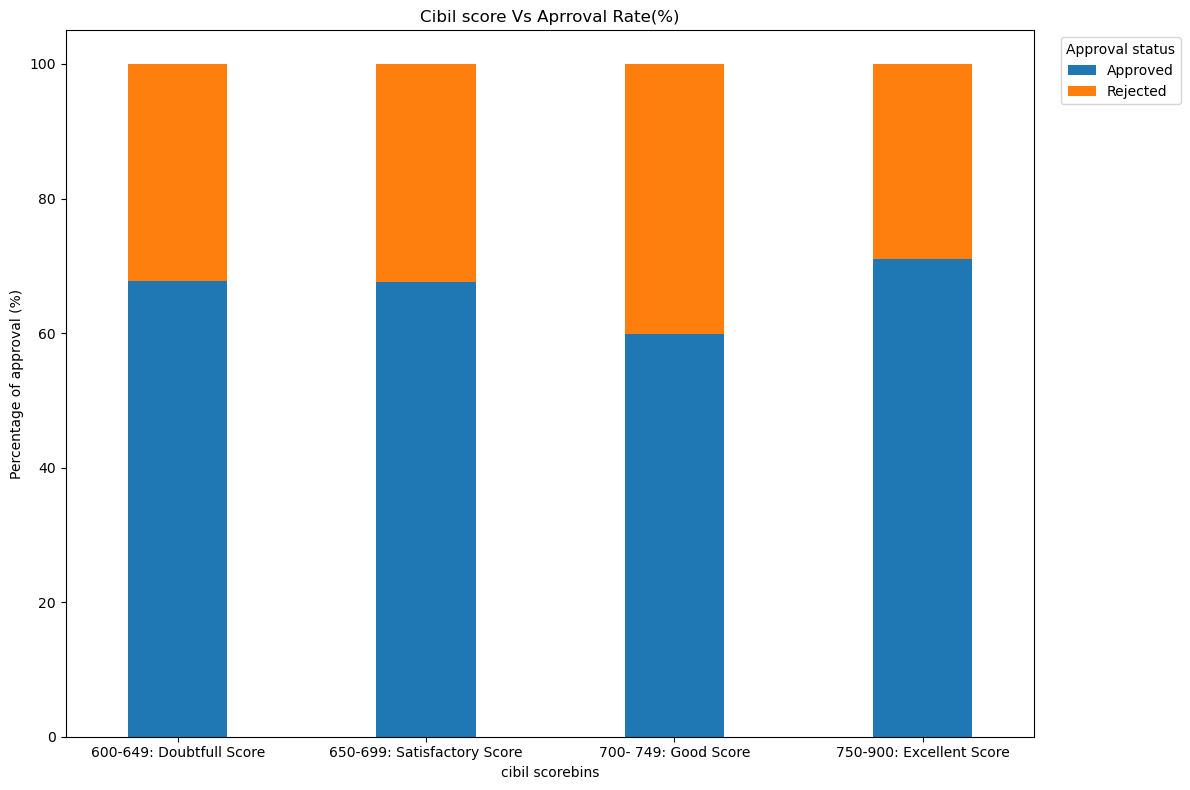

In [28]:
approval_rates = df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()
normalized_data=approval_rates.div(approval_rates.sum(axis=1),axis=0)*100
ax=normalized_data.plot(kind='bar',stacked=True,figsize=(12,8),width=0.4)

plt.xlabel('cibil scorebins')
plt.ylabel('Percentage of approval (%)')
plt.title('Cibil score Vs Aprroval Rate(%)')
plt.xticks(rotation=360)
        
# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

the above graph shows that the cibil score with 750-900 has more approval rate of 73%, 600-649 and 650-699 has same approval rate of  68%. the cibil score with 700-749 has less approval rate compared with others 60%

In [12]:
# Filter the DataFrame for CIBIL score bins between 600 and 649
filtered_df = df[(df['cibil_scorebins'] == '750-900: Excellent Score')]

# Use df.describe() to get summary statistics for the filtered data
print(filtered_df.describe())

           loan_id         age  no_of_dependents  income_annum  MonthlySalary  \
count   286.000000  286.000000        286.000000  2.860000e+02     286.000000   
mean    978.664336   41.877622          1.958042  1.167697e+06   97308.157343   
std     591.796444   13.731858          1.365613  4.952540e+05   41271.175108   
min       6.000000   18.000000          0.000000  3.029480e+05   25246.000000   
25%     460.500000   29.000000          1.000000  7.463505e+05   62195.750000   
50%     972.500000   42.500000          2.000000  1.189865e+06   99155.500000   
75%    1429.750000   54.000000          3.000000  1.621588e+06  135132.250000   
max    1997.000000   64.000000          4.000000  1.989947e+06  165829.000000   

       monthly_obligations  savings_account_balance  \
count           286.000000               286.000000   
mean          25333.381119            258338.010490   
std           14962.872183            145440.821732   
min              84.000000             10837.00000

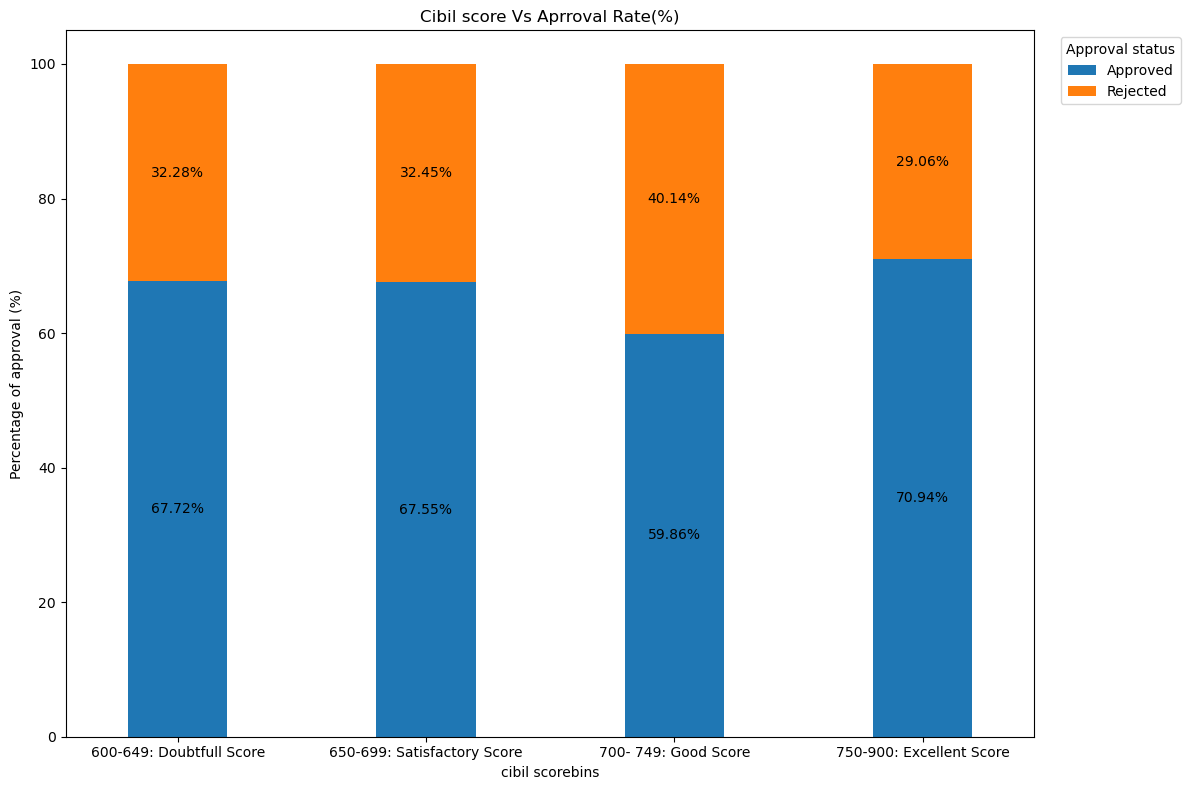

In [29]:
# Approval Rate Vs income bins
approval_rates = df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()
normalized_data=approval_rates.div(approval_rates.sum(axis=1),axis=0)*100
ax=normalized_data.plot(kind='bar',stacked=True,figsize=(12,8),width=0.4)


# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')
plt.xlabel('cibil scorebins')
plt.ylabel('Percentage of approval (%)')
plt.title('Cibil score Vs Aprroval Rate(%)')
plt.xticks(rotation=360)
        
# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

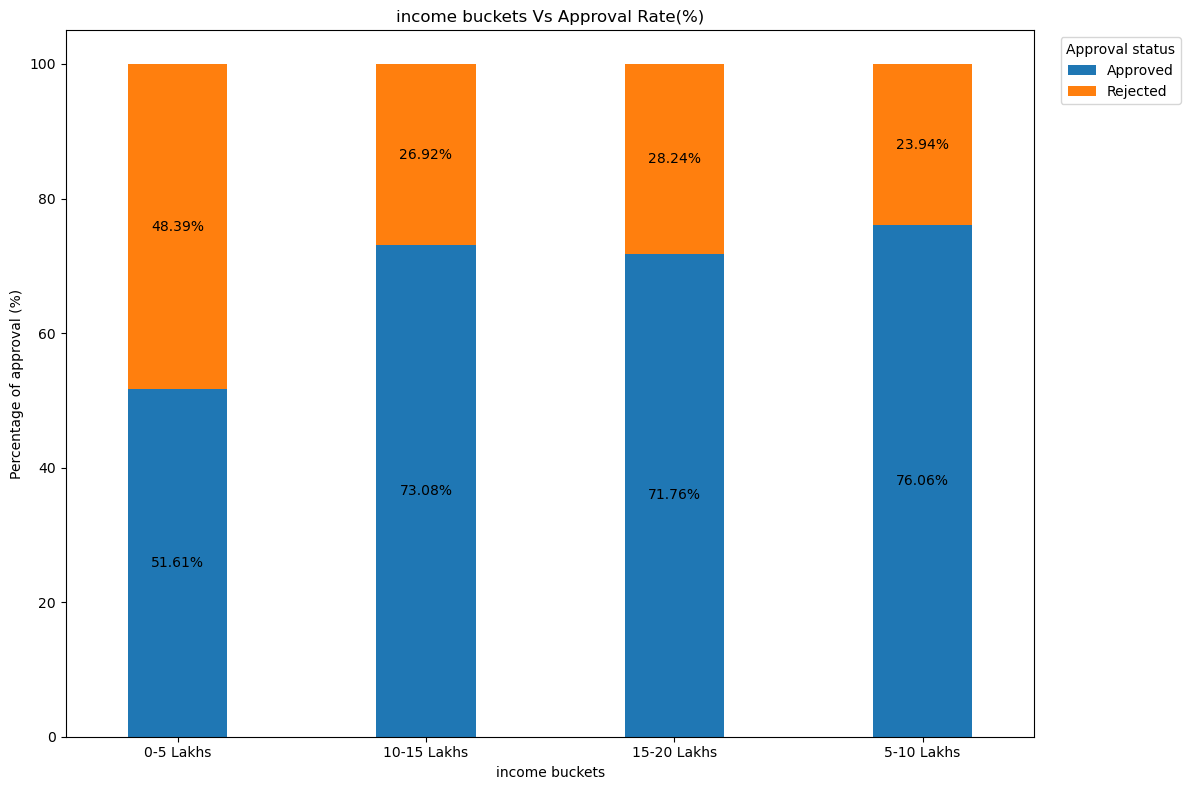

In [30]:
# Approval Rate Vs income buckets

# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Perform groupby operation on loan bins and approval status
approval_rates = filtered_df.groupby(['income_buckets', 'approval_status']).size().unstack()

# Normalize the data to calculate percentage of approval
normalized_data = approval_rates.div(approval_rates.sum(axis=1), axis=0) * 100

# Plot the subdivided bar graph
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.4)

# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('income buckets')
plt.ylabel('Percentage of approval (%)')
plt.title('income buckets Vs Approval Rate(%)')
plt.xticks(rotation=360)

# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


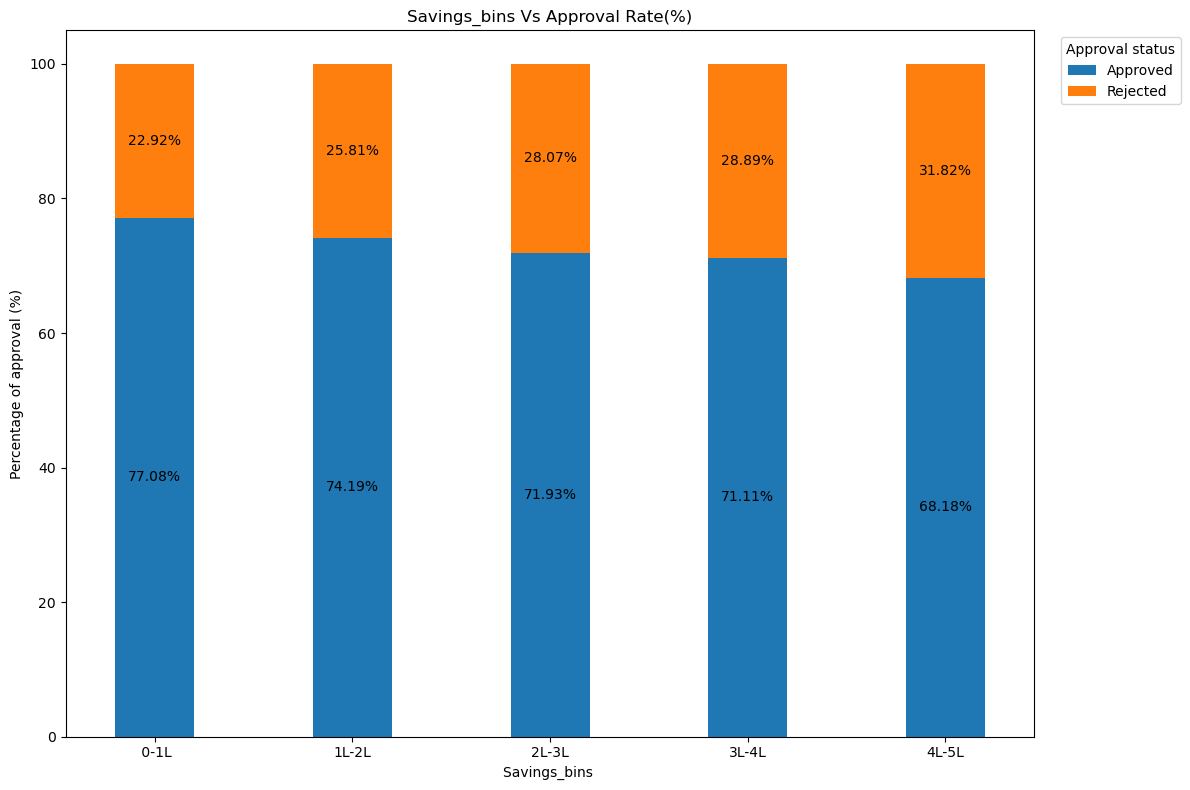

In [10]:
# Approval Rate Vs Saving account balance bins

# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Perform groupby operation on loan bins and approval status
approval_rates = filtered_df.groupby(['Savings_bins', 'approval_status']).size().unstack()

# Normalize the data to calculate percentage of approval
normalized_data = approval_rates.div(approval_rates.sum(axis=1), axis=0) * 100

# Plot the subdivided bar graph
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.4)

# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('Savings_bins ')
plt.ylabel('Percentage of approval (%)')
plt.title('Savings_bins Vs Approval Rate(%)')
plt.xticks(rotation=360)

# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

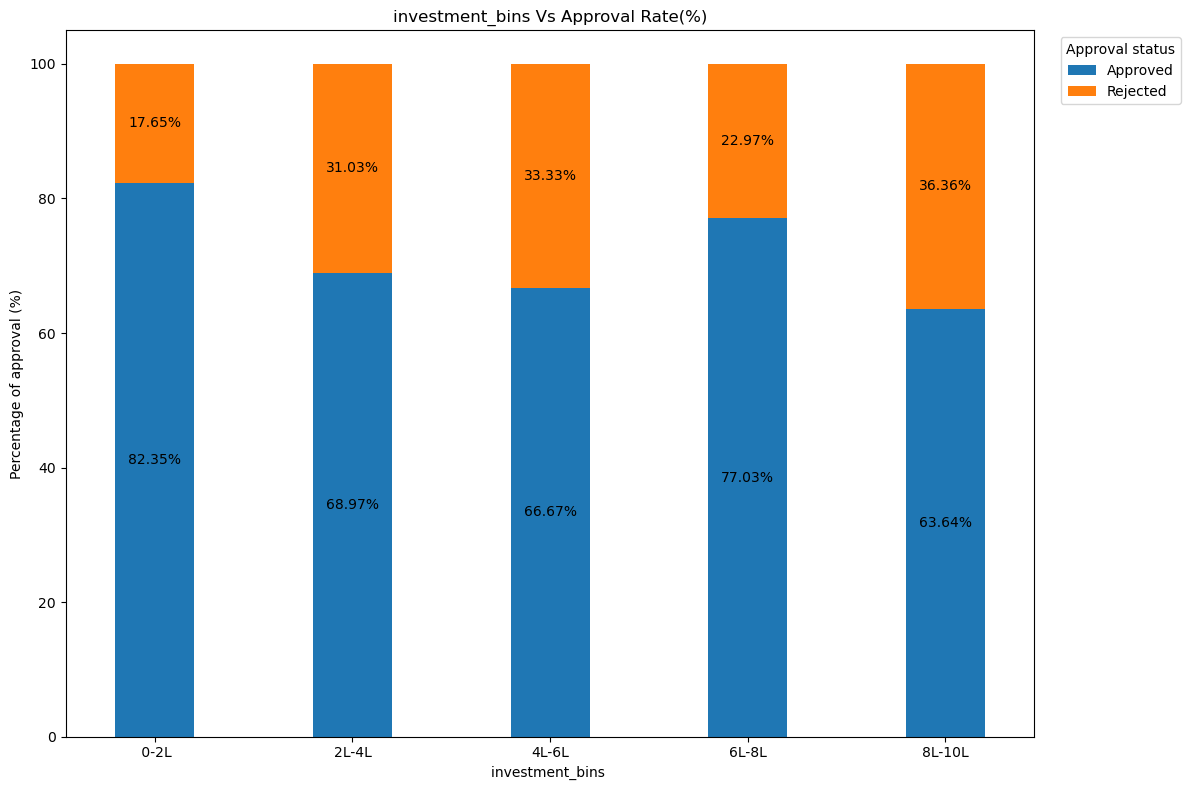

In [11]:
# Approval Rate Vs Investment portfolio bins

# Filter the DataFrame for CIBIL score bins between 700 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Perform groupby operation on loan bins and approval status
approval_rates = filtered_df.groupby(['investment_bins', 'approval_status']).size().unstack()

# Normalize the data to calculate percentage of approval
normalized_data = approval_rates.div(approval_rates.sum(axis=1), axis=0) * 100

# Plot the subdivided bar graph
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.4)

# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('investment_bins ')
plt.ylabel('Percentage of approval (%)')
plt.title('investment_bins Vs Approval Rate(%)')
plt.xticks(rotation=360)

# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

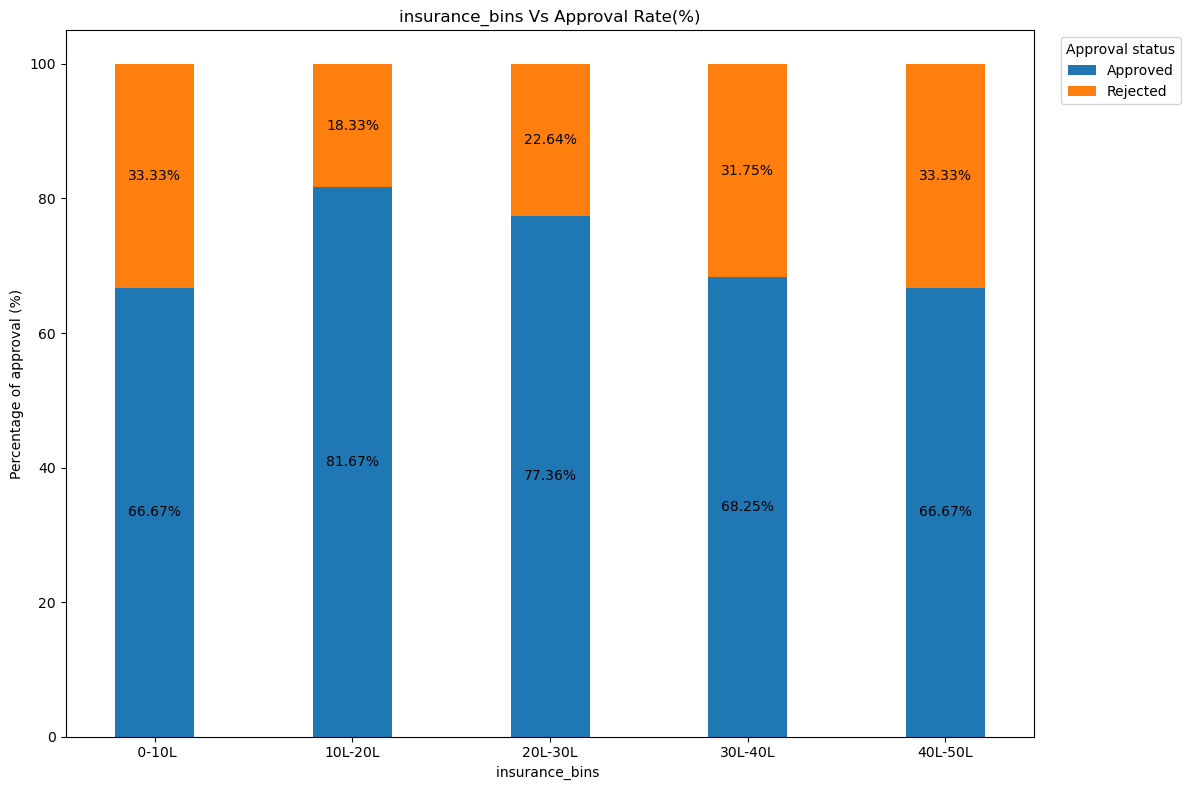

In [12]:
# Approval Rate Vs Insurance Policies bins

# Filter the DataFrame for CIBIL score bins between 700 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Perform groupby operation on loan bins and approval status
approval_rates = filtered_df.groupby(['insurance_bins', 'approval_status']).size().unstack()

# Normalize the data to calculate percentage of approval
normalized_data = approval_rates.div(approval_rates.sum(axis=1), axis=0) * 100

# Plot the subdivided bar graph
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.4)

# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('insurance_bins ')
plt.ylabel('Percentage of approval (%)')
plt.title('insurance_bins Vs Approval Rate(%)')
plt.xticks(rotation=360)

# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

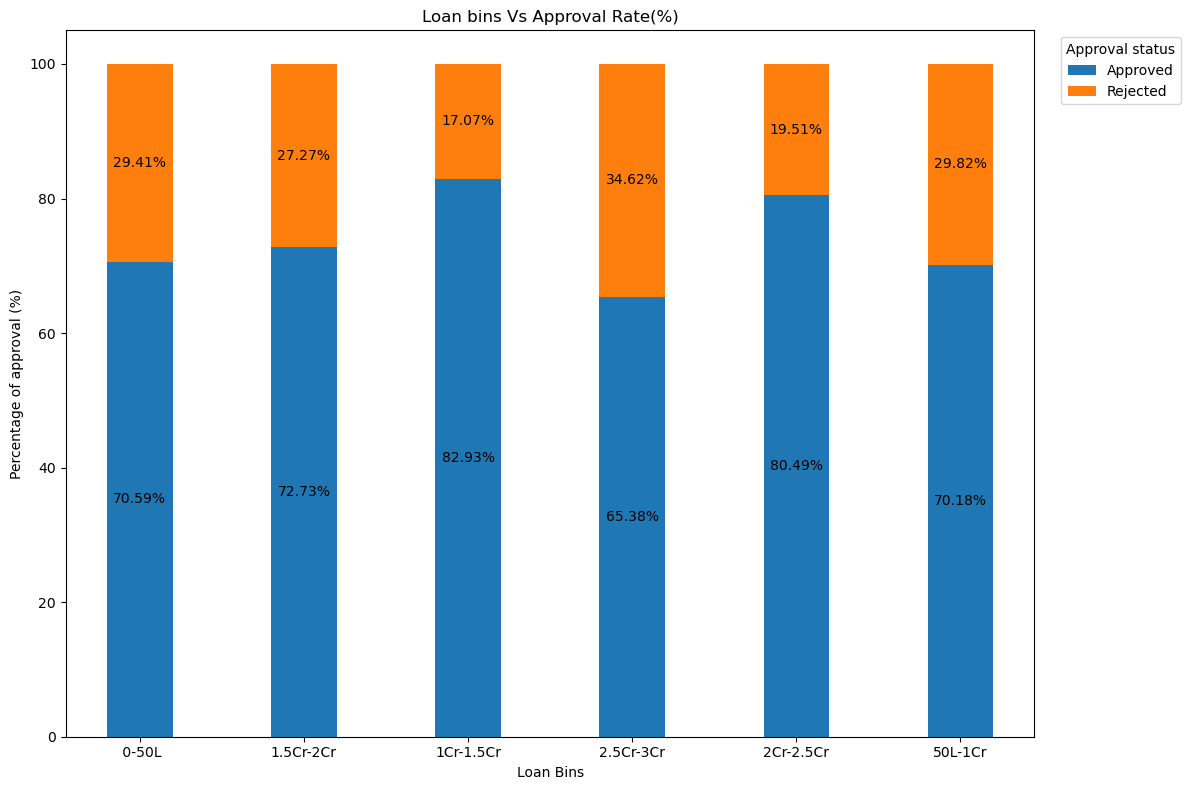

In [18]:
# Approval Rate Vs loan bins

# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Perform groupby operation on loan bins and approval status
approval_rates = filtered_df.groupby(['Loan_bins', 'approval_status']).size().unstack()

# Normalize the data to calculate percentage of approval
normalized_data = approval_rates.div(approval_rates.sum(axis=1), axis=0) * 100


# Plot the subdivided bar graph
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.4)

# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('Loan Bins')
plt.ylabel('Percentage of approval (%)')
plt.title('Loan bins Vs Approval Rate(%)')
plt.xticks(rotation=360)

# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


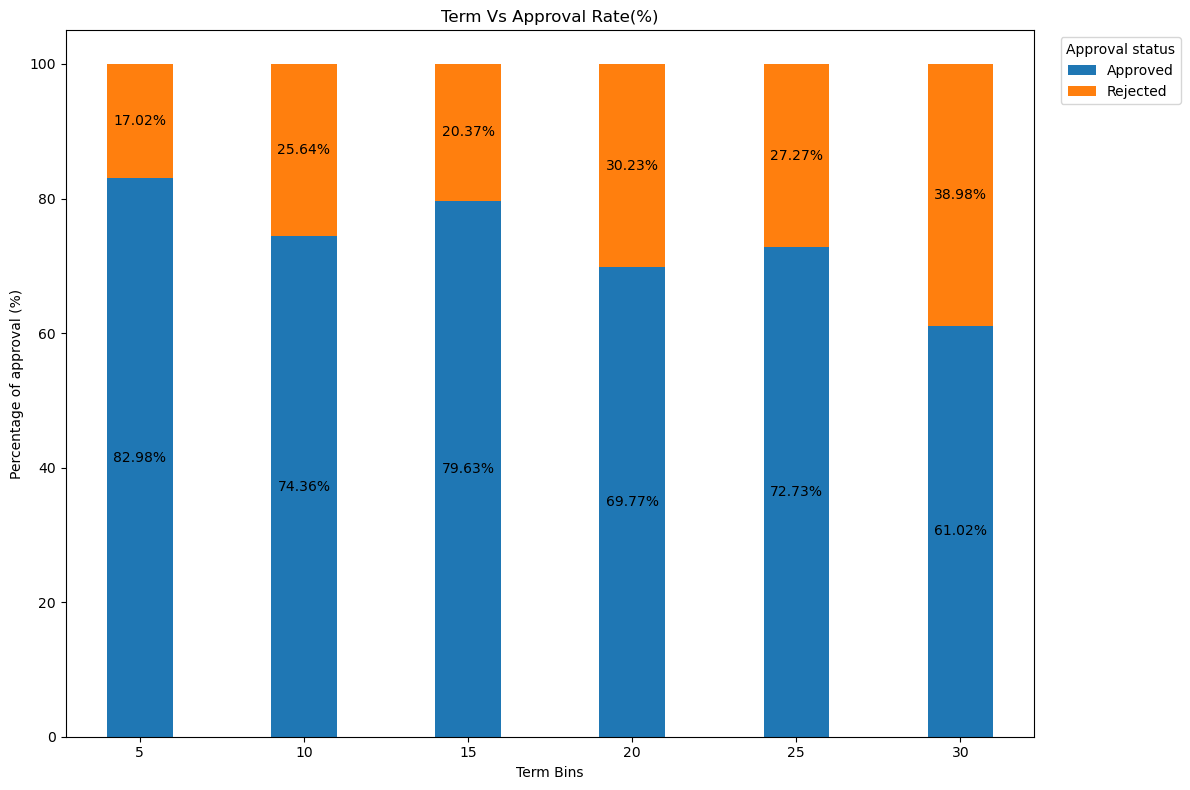

In [19]:
# Approval Rate Vs Term bins(ASK)

# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Perform groupby operation on loan bins and approval status
approval_rates = filtered_df.groupby(['loan_term_yrs', 'approval_status']).size().unstack()

# Normalize the data to calculate percentage of approval
normalized_data = approval_rates.div(approval_rates.sum(axis=1), axis=0) * 100


# Plot the subdivided bar graph
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.4)

# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('Term Bins')
plt.ylabel('Percentage of approval (%)')
plt.title('Term Vs Approval Rate(%)')
plt.xticks(rotation=360)

# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


approval rate is decreased when no of years are more

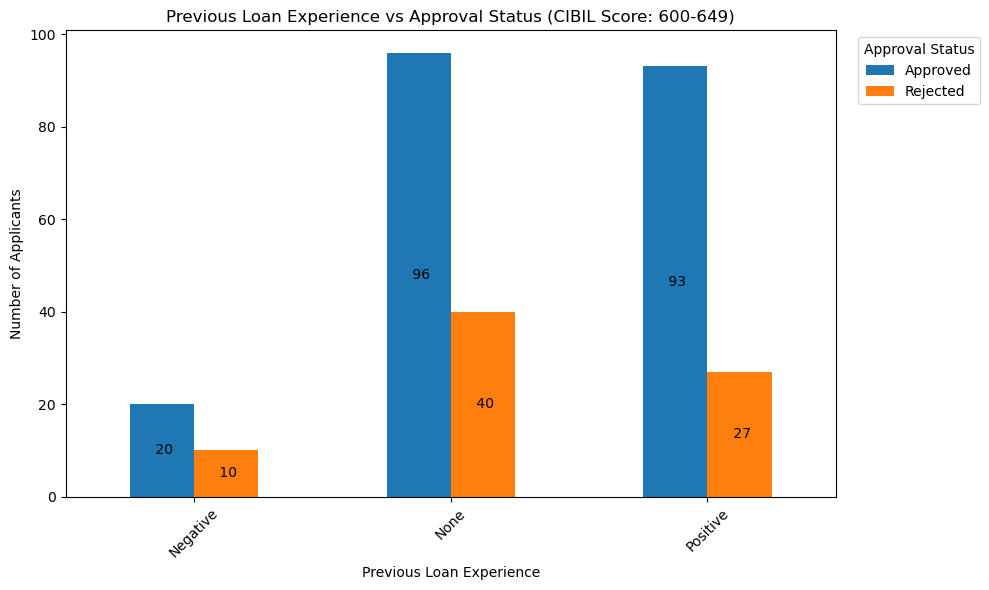

In [20]:
# Previous_loan_experience Vs Approval Status


# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by previous loan experience and approval status
approval_by_experience = filtered_df.groupby(['previous_loan_experience', 'approval_status']).size().unstack()

# Plot the grouped bar chart
ax = approval_by_experience.plot(kind='bar', stacked=False, figsize=(10, 6))
# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Previous Loan Experience')
plt.ylabel('Number of Applicants')
plt.title('Previous Loan Experience vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()


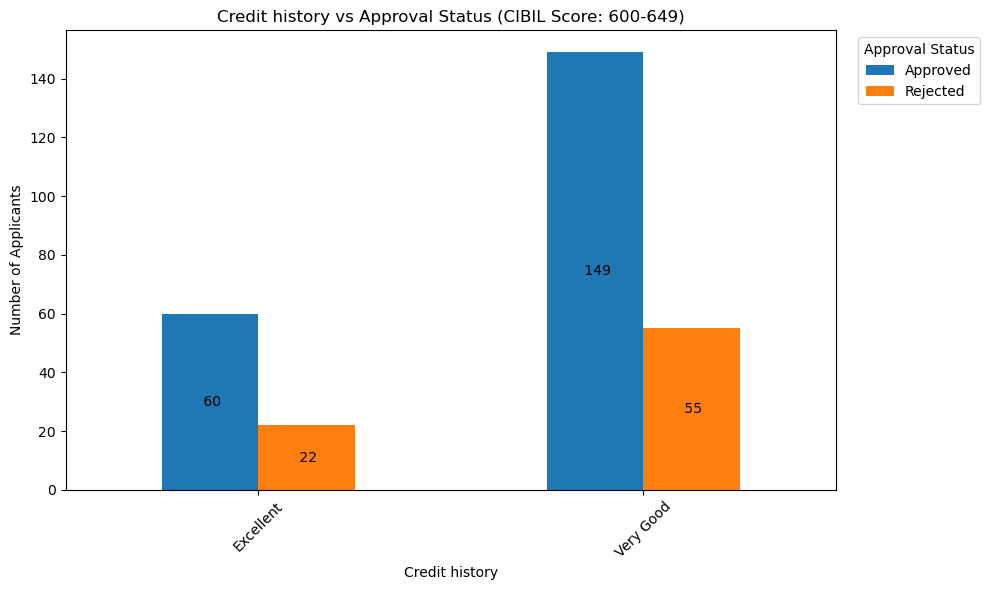

In [21]:
# Credit history Vs Approval Status

# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by previous loan experience and approval status
approval_by_credit = filtered_df.groupby(['credit_history','approval_status']).size().unstack()

# Plot the grouped bar chart
ax = approval_by_credit.plot(kind='bar', stacked=False, figsize=(10, 6))
# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Credit history')
plt.ylabel('Number of Applicants')
plt.title('Credit history vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()


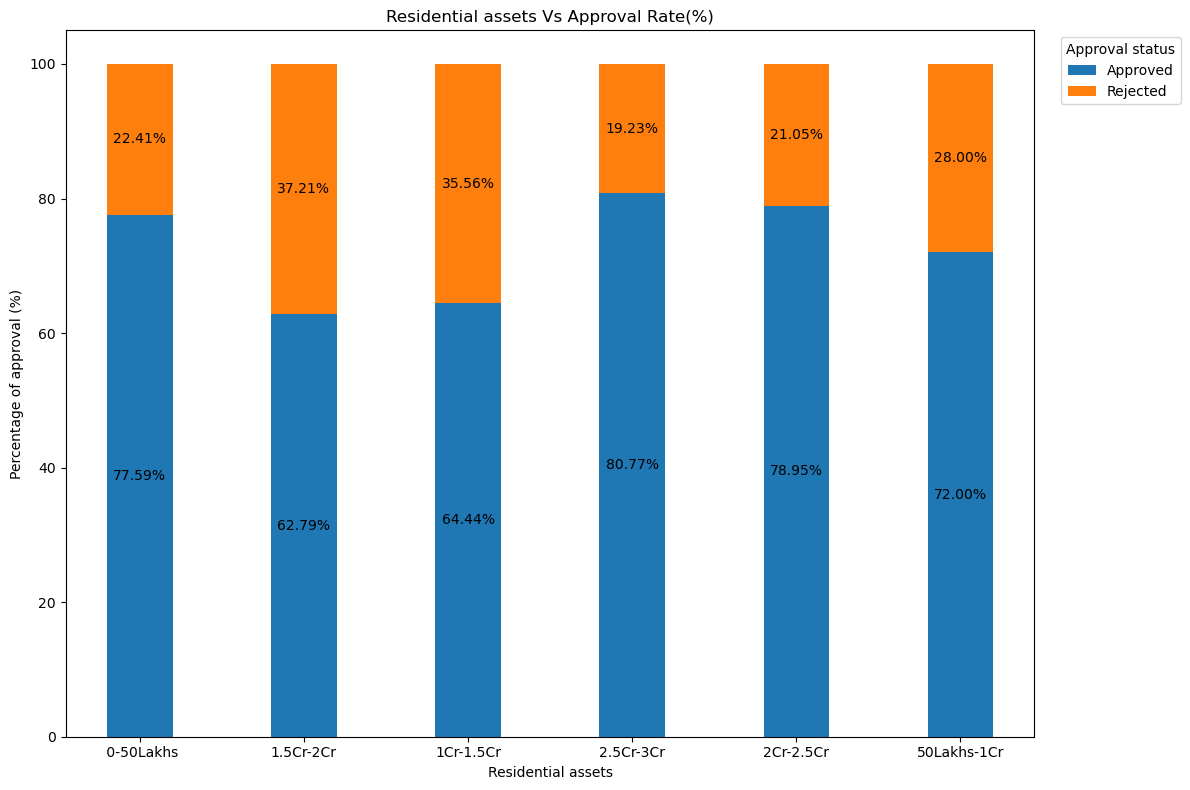

In [22]:
# Residential assets Vs Approval Rate

# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Perform groupby operation on loan bins and approval status
approval_rates = filtered_df.groupby(['Residentialasset_bins', 'approval_status']).size().unstack()

# Normalize the data to calculate percentage of approval
normalized_data = approval_rates.div(approval_rates.sum(axis=1), axis=0) * 100


# Plot the subdivided bar graph
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.4)

# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('Residential assets')
plt.ylabel('Percentage of approval (%)')
plt.title('Residential assets Vs Approval Rate(%)')
plt.xticks(rotation=360)

# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


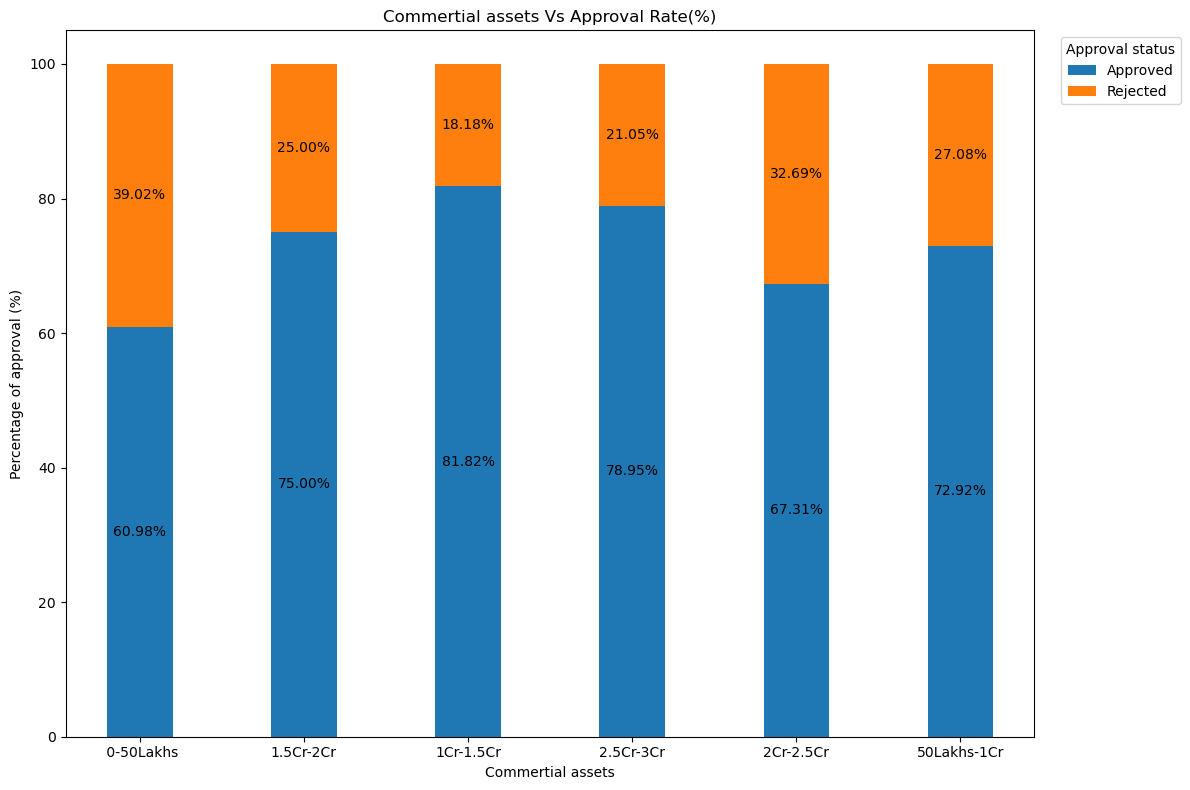

In [23]:
# Commertial assets Vs Approval status
# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Perform groupby operation on loan bins and approval status
approval_rates = filtered_df.groupby(['Commertialasset_bins', 'approval_status']).size().unstack()

# Normalize the data to calculate percentage of approval
normalized_data = approval_rates.div(approval_rates.sum(axis=1), axis=0) * 100


# Plot the subdivided bar graph
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.4)

# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('Commertial assets')
plt.ylabel('Percentage of approval (%)')
plt.title('Commertial assets Vs Approval Rate(%)')
plt.xticks(rotation=360)

# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


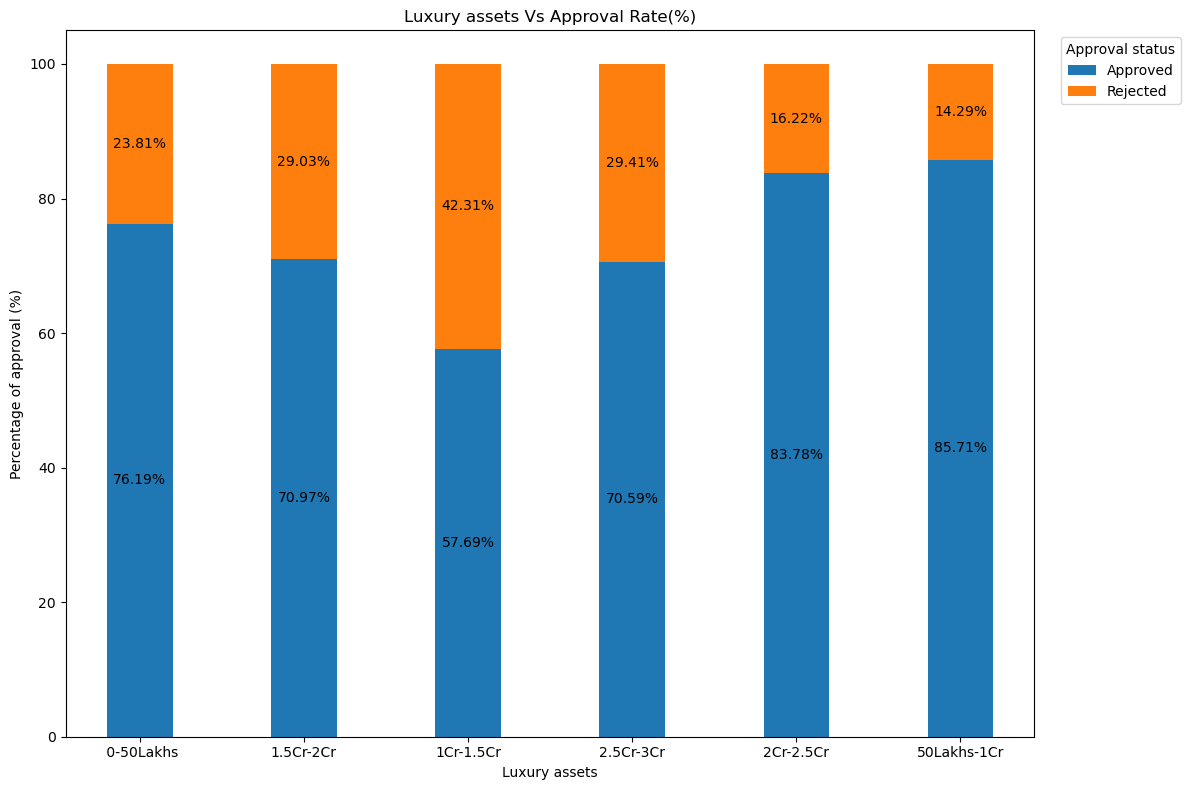

In [24]:
# Luxury assets Vs Approval rates
# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Perform groupby operation on loan bins and approval status
approval_rates = filtered_df.groupby(['Luxuryasset_bins', 'approval_status']).size().unstack()

# Normalize the data to calculate percentage of approval
normalized_data = approval_rates.div(approval_rates.sum(axis=1), axis=0) * 100


# Plot the subdivided bar graph
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.4)

# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('Luxury assets')
plt.ylabel('Percentage of approval (%)')
plt.title('Luxury assets Vs Approval Rate(%)')
plt.xticks(rotation=360)

# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


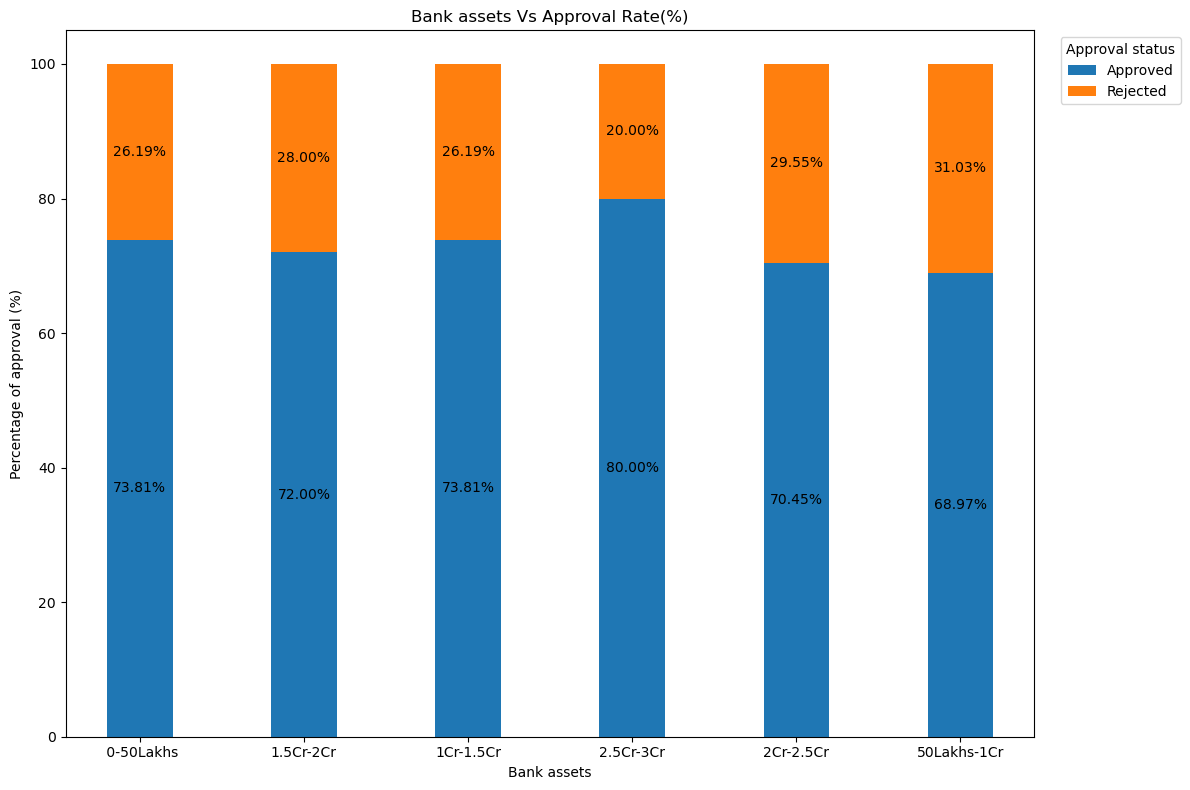

In [25]:
# Bank assets Vs Approval Rates
# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Perform groupby operation on loan bins and approval status
approval_rates = filtered_df.groupby(['Bankasset_bins', 'approval_status']).size().unstack()

# Normalize the data to calculate percentage of approval
normalized_data = approval_rates.div(approval_rates.sum(axis=1), axis=0) * 100


# Plot the subdivided bar graph
ax = normalized_data.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.4)

# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('Bank assets')
plt.ylabel('Percentage of approval (%)')
plt.title('Bank assets Vs Approval Rate(%)')
plt.xticks(rotation=360)

# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


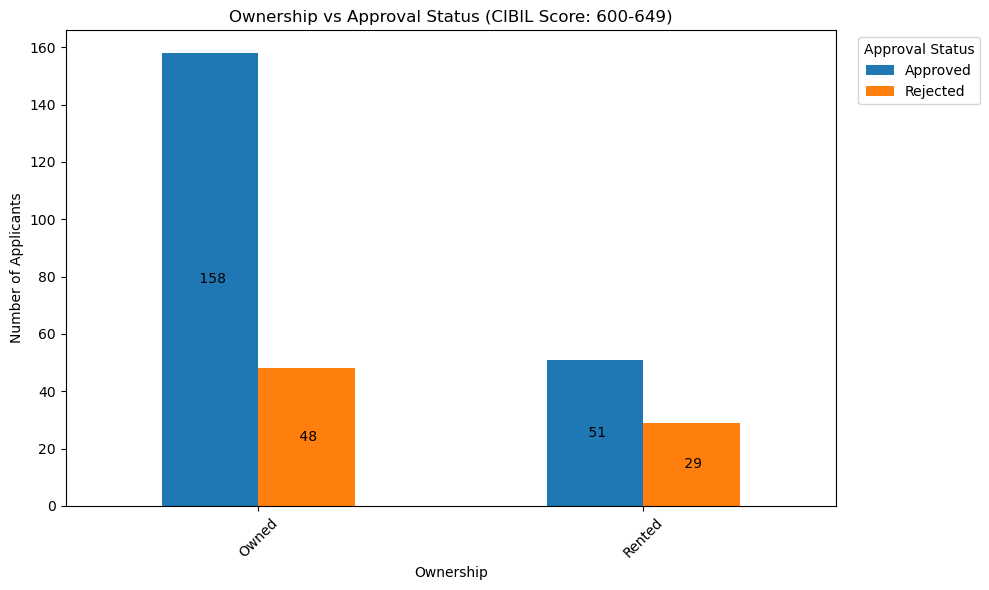

In [26]:
# property ownership Vs Approval Rates
# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by previous loan experience and approval status
approval_by_ownership = filtered_df.groupby(['property_ownership','approval_status']).size().unstack()

# Plot the grouped bar chart
ax = approval_by_ownership.plot(kind='bar', stacked=False, figsize=(10, 6))
# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Ownership')
plt.ylabel('Number of Applicants')
plt.title('Ownership vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

Demographics

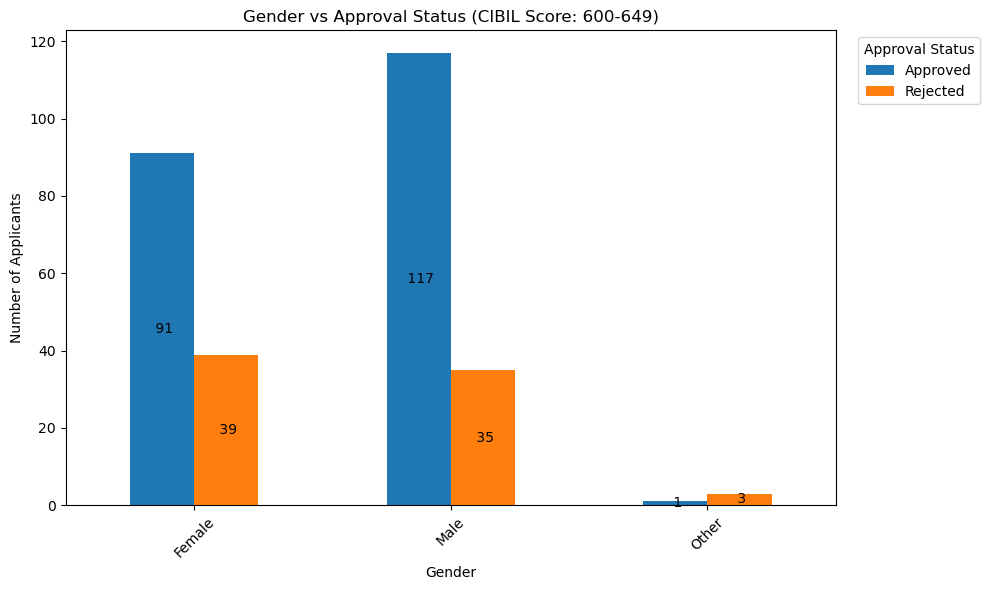

In [27]:
# Gender Vs Approval Rates
# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by previous loan experience and approval status
approval_by_gender = filtered_df.groupby(['gender','approval_status']).size().unstack()

# Plot the grouped bar chart
ax = approval_by_gender.plot(kind='bar', stacked=False, figsize=(10, 6))
# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.title('Gender vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

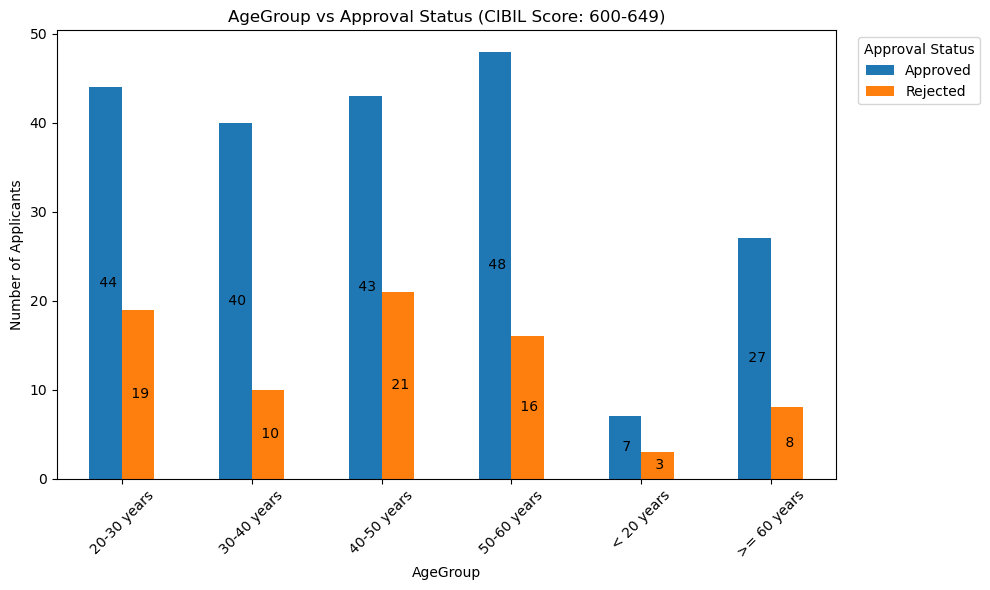

In [28]:
# AgeGroup Vs Approval Rates

# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by previous loan experience and approval status
approval_by_age = filtered_df.groupby(['AgeGroup','approval_status']).size().unstack()

# Plot the grouped bar chart
ax = approval_by_age.plot(kind='bar', stacked=False, figsize=(10, 6))
# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('AgeGroup')
plt.ylabel('Number of Applicants')
plt.title('AgeGroup vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

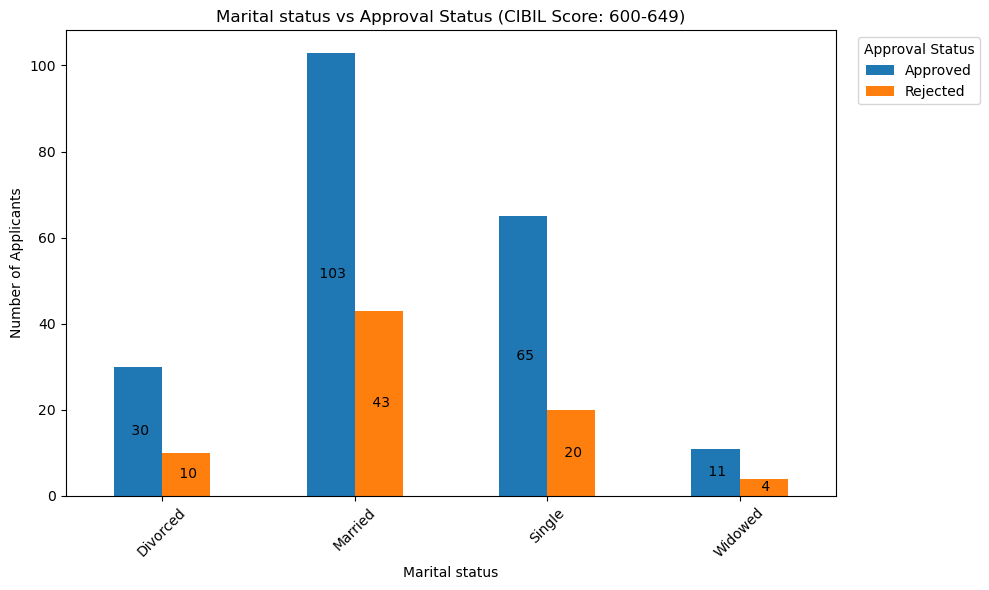

In [29]:
# Marital status Vs Approval rates
# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by previous loan experience and approval status
approval = filtered_df.groupby(['marital_status','approval_status']).size().unstack()

# Plot the grouped bar chart
ax = approval.plot(kind='bar', stacked=False, figsize=(10, 6))
# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Marital status')
plt.ylabel('Number of Applicants')
plt.title('Marital status vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

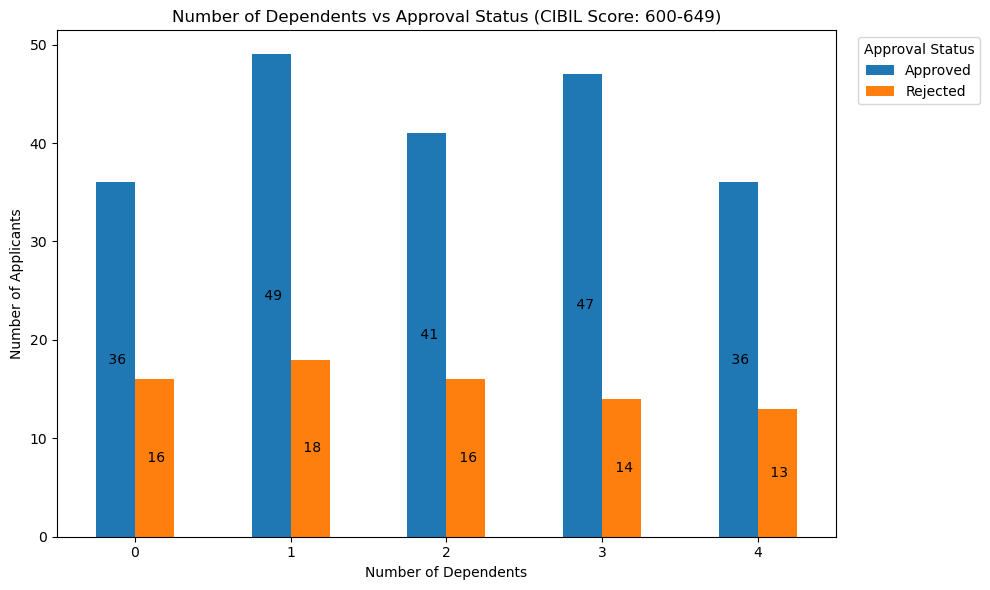

In [30]:
# no_of_dependents Vs Approval Status

# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by number of dependents and approval status
approval_by_dependents = filtered_df.groupby(['no_of_dependents', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_dependents.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Number of Dependents')
plt.ylabel('Number of Applicants')
plt.title('Number of Dependents vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=0)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()


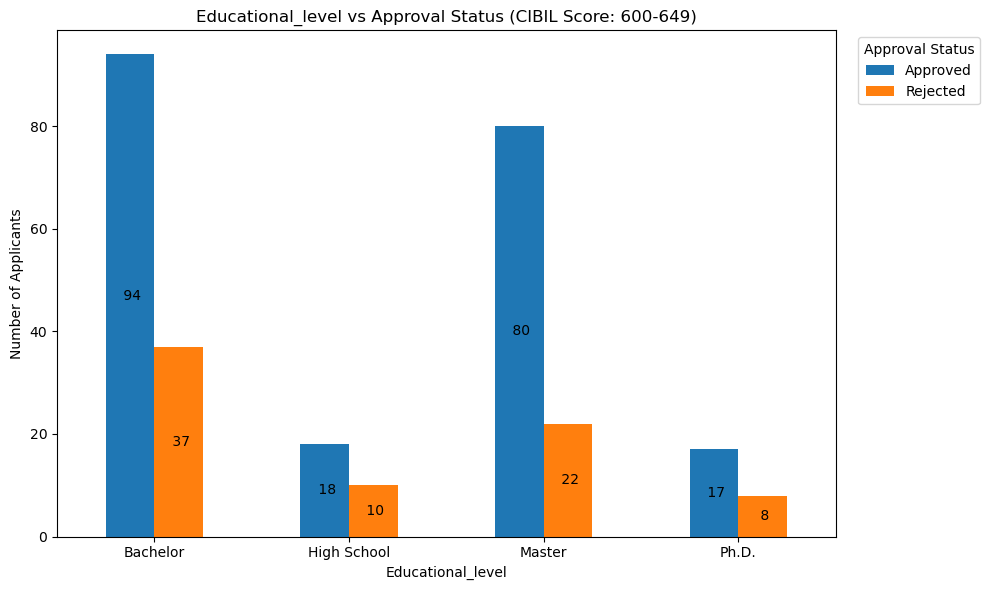

In [31]:
# Educational_level Vs Approval Rates

# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by number of dependents and approval status
approval_by_edu = filtered_df.groupby(['educational_level', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_edu.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Educational_level')
plt.ylabel('Number of Applicants')
plt.title('Educational_level vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=0)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()


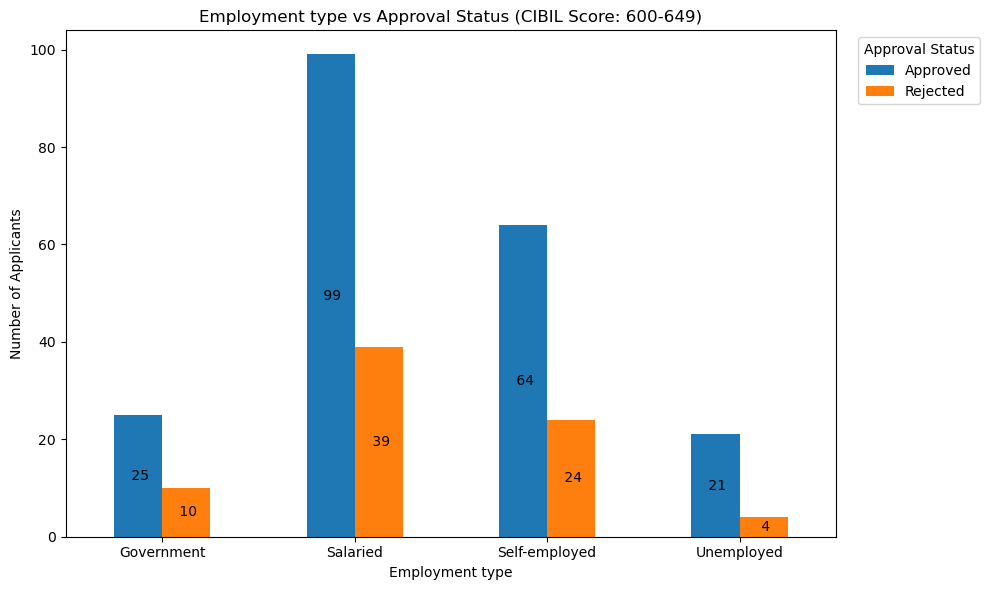

In [32]:
# Employment type Vs Approval Rates
# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by number of dependents and approval status
approval_by_emp = filtered_df.groupby(['employment_type', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_emp.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Employment type')
plt.ylabel('Number of Applicants')
plt.title('Employment type vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=0)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()


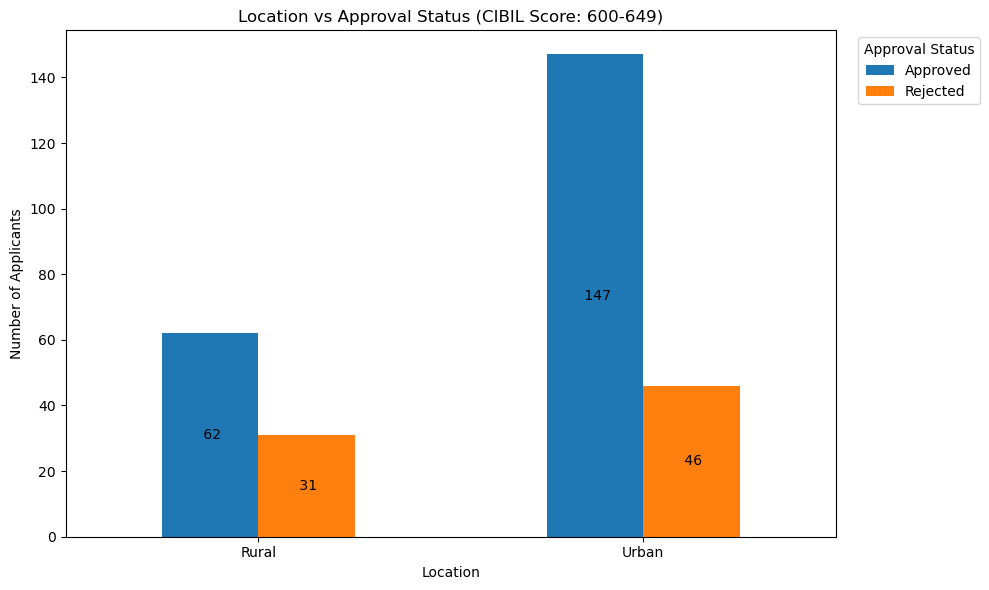

In [33]:
# Geographical location Vs Approval Rates
# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by number of dependents and approval status
approval_by_geo = filtered_df.groupby(['geographical_location', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_geo.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Location')
plt.ylabel('Number of Applicants')
plt.title('Location vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=0)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()


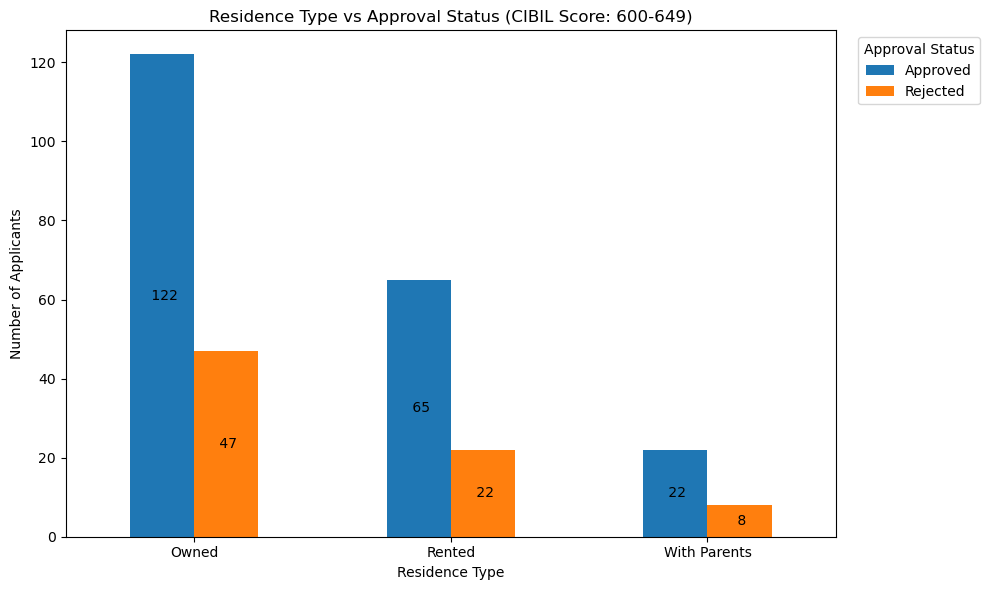

In [34]:
# type_of_residence Vs Approval Rate
# Filter the DataFrame for CIBIL score bins between 750 and 900
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group by number of dependents and approval status
approval_by_res = filtered_df.groupby(['type_of_residence', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_res.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Residence Type')
plt.ylabel('Number of Applicants')
plt.title('Residence Type vs Approval Status (CIBIL Score: 600-649)')
plt.xticks(rotation=0)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()


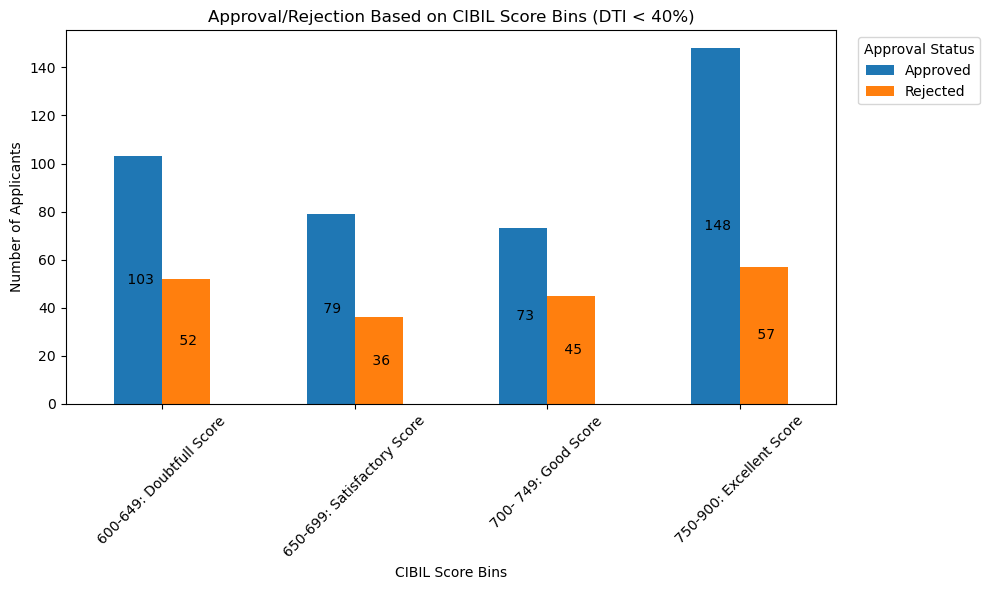

In [8]:
# Filter the DataFrame based on specified CIBIL score bins and DTI ratio
filtered_df = df[(df['DTI'] < 43) & 
                 ((df['cibil_scorebins'] == '600-649: Doubtfull Score') | 
                  (df['cibil_scorebins'] == '650-699: Satisfactory Score') | 
                  (df['cibil_scorebins'] == '700- 749: Good Score') | 
                  (df['cibil_scorebins'] == '750-900: Excellent Score'))]

# Group by CIBIL score bins and approval status
approval_by_score_bins = filtered_df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_score_bins.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('CIBIL Score Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval/Rejection Based on CIBIL Score Bins (DTI < 40%)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

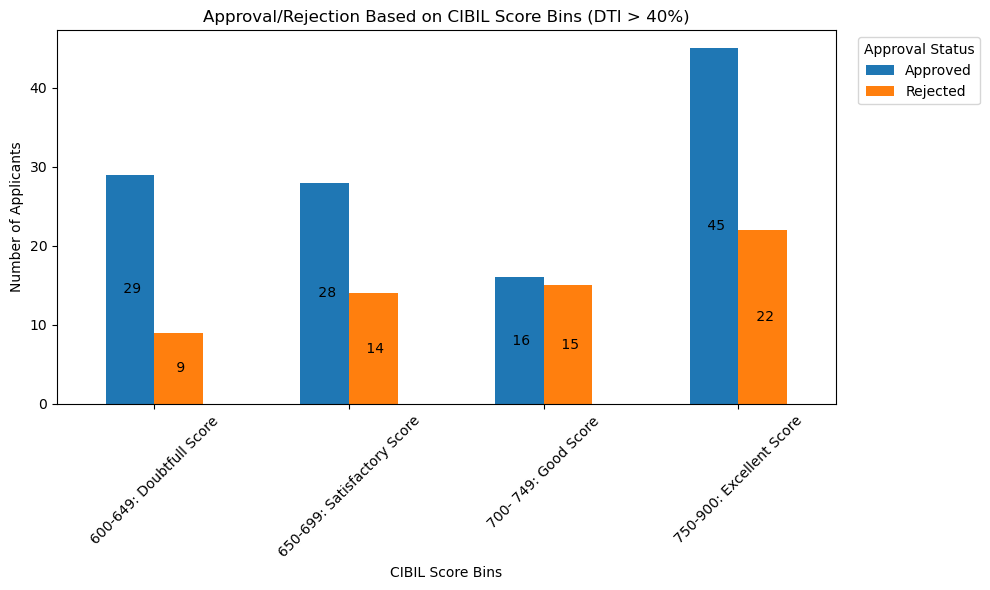

In [9]:
# Filter the DataFrame based on specified CIBIL score bins and DTI ratio
filtered_df = df[(df['DTI'] > 40) & 
                 ((df['cibil_scorebins'] == '600-649: Doubtfull Score') | 
                  (df['cibil_scorebins'] == '650-699: Satisfactory Score') | 
                  (df['cibil_scorebins'] == '700- 749: Good Score') | 
                  (df['cibil_scorebins'] == '750-900: Excellent Score'))]

# Group by CIBIL score bins and approval status
approval_by_score_bins = filtered_df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_score_bins.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('CIBIL Score Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval/Rejection Based on CIBIL Score Bins (DTI > 40%)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

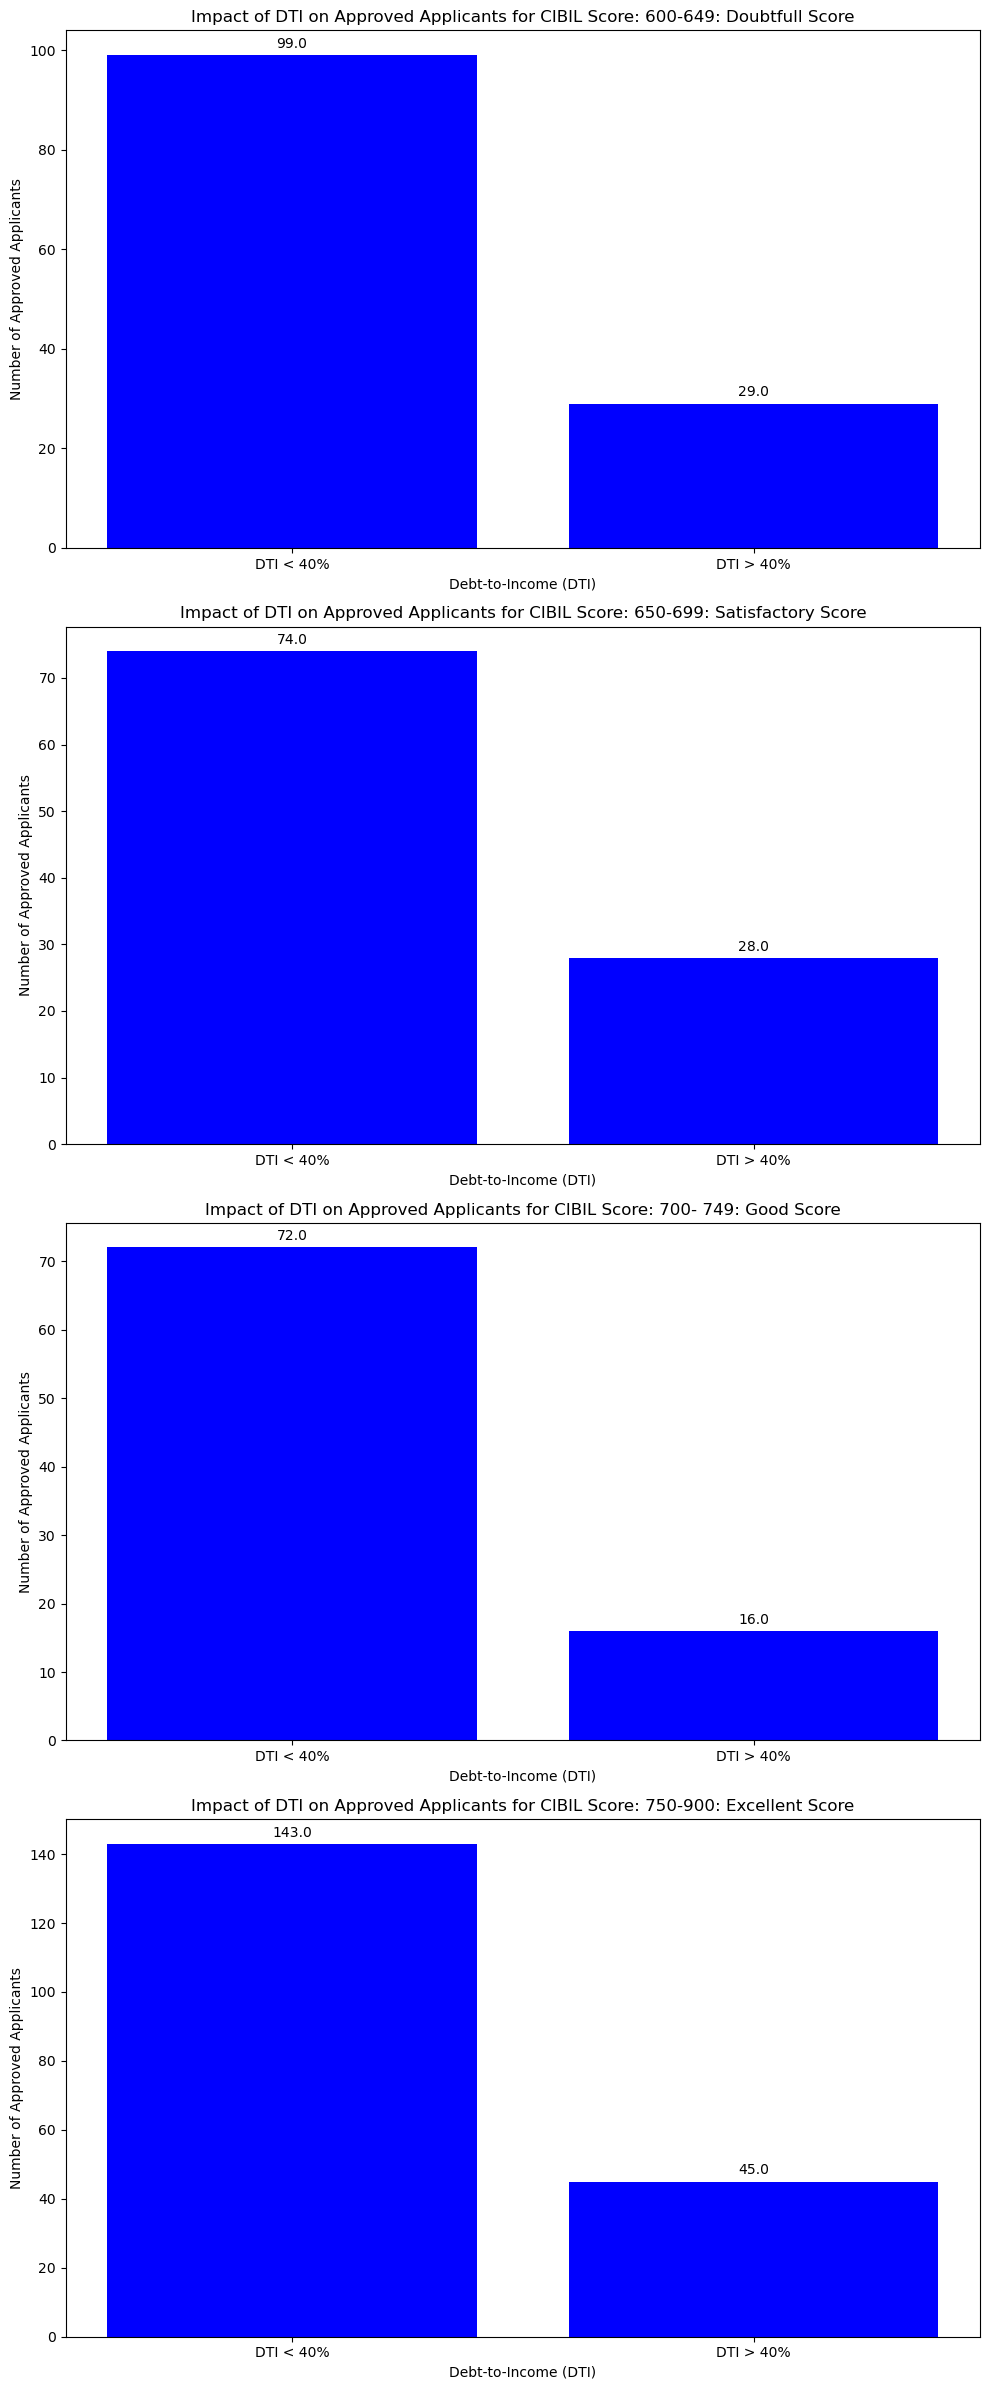

In [10]:


# Filter the DataFrame for the specified CIBIL score bins
cibil_scorebins = ['600-649: Doubtfull Score', '650-699: Satisfactory Score', '700- 749: Good Score', '750-900: Excellent Score']

# Create subplots for each CIBIL score bin
fig, axs = plt.subplots(nrows=len(cibil_scorebins), ncols=1, figsize=(10, 6*len(cibil_scorebins)))

for idx, score_bin in enumerate(cibil_scorebins):
    # Filter the DataFrame based on CIBIL score bin
    filtered_df = df[df['cibil_scorebins'] == score_bin]
    
    # Group by DTI and approval status
    approval_by_dti = filtered_df.groupby(['DTI', 'approval_status']).size().unstack()
    
    # Get counts of approved applicants for DTI < 40% and > 40%
    count_approved_lt_40 = approval_by_dti.loc[approval_by_dti.index < 40, 'Approved'].sum()
    count_approved_gt_40 = approval_by_dti.loc[approval_by_dti.index >= 40, 'Approved'].sum()
    
    # Plot the bar chart
    bars = axs[idx].bar(['DTI < 40%', 'DTI > 40%'], [count_approved_lt_40, count_approved_gt_40], color='blue')
    axs[idx].set_title(f'Impact of DTI on Approved Applicants for CIBIL Score: {score_bin}')
    axs[idx].set_xlabel('Debt-to-Income (DTI)')
    axs[idx].set_ylabel('Number of Approved Applicants')
    
    # Annotate the bars with the counts
    for bar in bars:
        height = bar.get_height()
        axs[idx].annotate('{}'.format(height),
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


In [18]:
#Impb

# Filter the dataset for approved loans with DTI < 40%
approved_low_dti = df[(df['approval_status'] == 'Rejected') & (df['DTI'] < 40)]

# Analyze key compensating factors
compensating_factors = approved_low_dti[['income_annum', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'savings_account_balance', 'investment_portfolio_value', 'credit_history']]

# Calculate summary statistics for these factors
summary_statistics = compensating_factors.describe()

print("Summary Statistics for Approved low DTI Loans:")
print(summary_statistics)


Summary Statistics for Approved low DTI Loans:
       income_annum  cibil_score  residential_assets_value  \
count  1.860000e+02   186.000000              1.860000e+02   
mean   1.309711e+06   659.779570              1.487725e+07   
std    4.730625e+05   157.466461              8.514655e+06   
min    3.075640e+05     0.000000              1.872570e+05   
25%    9.636588e+05   580.000000              7.727871e+06   
50%    1.378903e+06   712.500000              1.497816e+07   
75%    1.674788e+06   759.500000              2.157050e+07   
max    1.992789e+06   897.000000              2.992337e+07   

       commercial_assets_value  luxury_assets_value  savings_account_balance  \
count             1.860000e+02         1.860000e+02               186.000000   
mean              1.480006e+07         1.560817e+07            251225.102151   
std               9.102327e+06         9.059653e+06            142792.897545   
min               5.044500e+04         2.712970e+05             10837.0000

In [19]:
import pandas as pd

# Assume df is already loaded with your data

# Create a column for total assets
df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value']

# Filter for approved and rejected applicants
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Calculate the ratios
approved_df['loan_to_income_ratio'] = approved_df['loan_amount'] / approved_df['income_annum']
approved_df['loan_to_assets_ratio'] = approved_df['loan_amount'] / approved_df['total_assets']

rejected_df['loan_to_income_ratio'] = rejected_df['loan_amount'] / rejected_df['income_annum']
rejected_df['loan_to_assets_ratio'] = rejected_df['loan_amount'] / rejected_df['total_assets']

# Calculate summary statistics for the ratios
approved_ratios_summary = approved_df[['loan_to_income_ratio', 'loan_to_assets_ratio']].describe()
rejected_ratios_summary = rejected_df[['loan_to_income_ratio', 'loan_to_assets_ratio']].describe()

print("Summary Statistics for Approved Applicants:")
print(approved_ratios_summary)

print("\nSummary Statistics for Rejected Applicants:")
print(rejected_ratios_summary)


Summary Statistics for Approved Applicants:
       loan_to_income_ratio  loan_to_assets_ratio
count            506.000000            506.000000
mean              16.426140              0.400246
std               14.889419              0.379669
min                0.095092              0.004224
25%                6.324464              0.171347
50%               12.394044              0.343565
75%               21.027859              0.534194
max               87.860498              3.948918

Summary Statistics for Rejected Applicants:
       loan_to_income_ratio  loan_to_assets_ratio
count            246.000000            246.000000
mean              18.094805              0.398090
std               16.545225              0.324909
min                0.061163              0.002786
25%                5.551547              0.167014
50%               13.457554              0.337383
75%               23.115551              0.516277
max               88.206639              2.292710


C:\Users\vyshn\AppData\Local\Temp\ipykernel_18932\3887659666.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_df['loan_to_income_ratio'] = approved_df['loan_amount'] / approved_df['income_annum']
C:\Users\vyshn\AppData\Local\Temp\ipykernel_18932\3887659666.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_df['loan_to_assets_ratio'] = approved_df['loan_amount'] / approved_df['total_assets']
C:\Users\vyshn\AppData\Local\Temp\ipykernel_18932\3887659666.py:16: SettingWithCopyWarning: 
A

In [21]:
import pandas as pd

# Assume df is already loaded with your data

# Filter the dataset for rejected loans with DTI < 40%
rejected_low_dti = df[(df['approval_status'] == 'Rejected') & (df['DTI'] < 40)]

# Filter the dataset for approved loans with DTI < 40% for comparison
approved_low_dti = df[(df['approval_status'] == 'Approved') & (df['DTI'] < 40)]

# Calculate summary statistics for loan amount and loan term for rejected and approved loans
rejected_summary = rejected_low_dti[['loan_amount', 'loan_term_yrs']].describe()
approved_summary = approved_low_dti[['loan_amount', 'loan_term_yrs']].describe()

print("Summary Statistics for Rejected Low DTI Loans:")
print(rejected_summary)

print("\nSummary Statistics for Approved Low DTI Loans:")
print(approved_summary)


Summary Statistics for Rejected Low DTI Loans:
        loan_amount  loan_term_yrs
count  1.860000e+02     186.000000
mean   1.515890e+07      19.758065
std    9.437782e+06       8.796226
min    8.307700e+04       5.000000
25%    6.525805e+06      11.250000
50%    1.478405e+07      20.000000
75%    2.400549e+07      28.750000
max    2.981955e+07      30.000000

Summary Statistics for Approved Low DTI Loans:
        loan_amount  loan_term_yrs
count  3.880000e+02     388.000000
mean   1.525474e+07      17.177835
std    8.925696e+06       8.571742
min    2.410400e+05       5.000000
25%    7.439719e+06      10.000000
50%    1.517130e+07      15.000000
75%    2.323021e+07      25.000000
max    2.998656e+07      30.000000


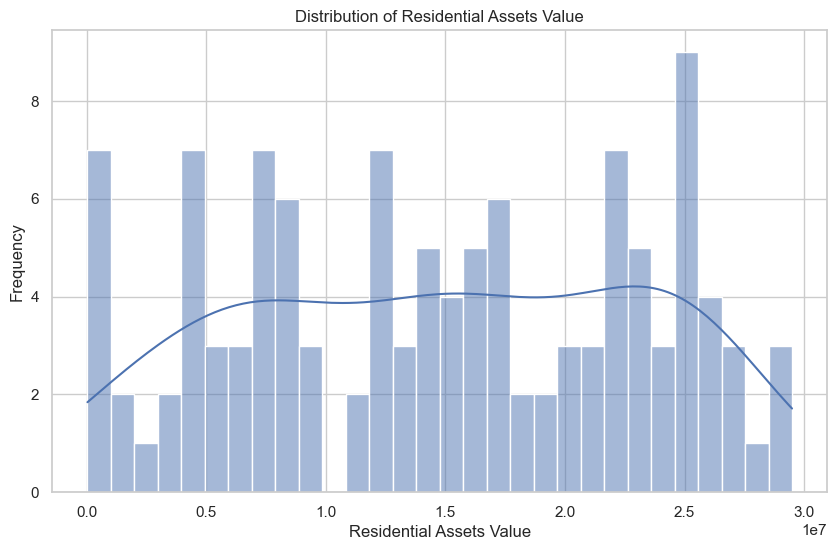

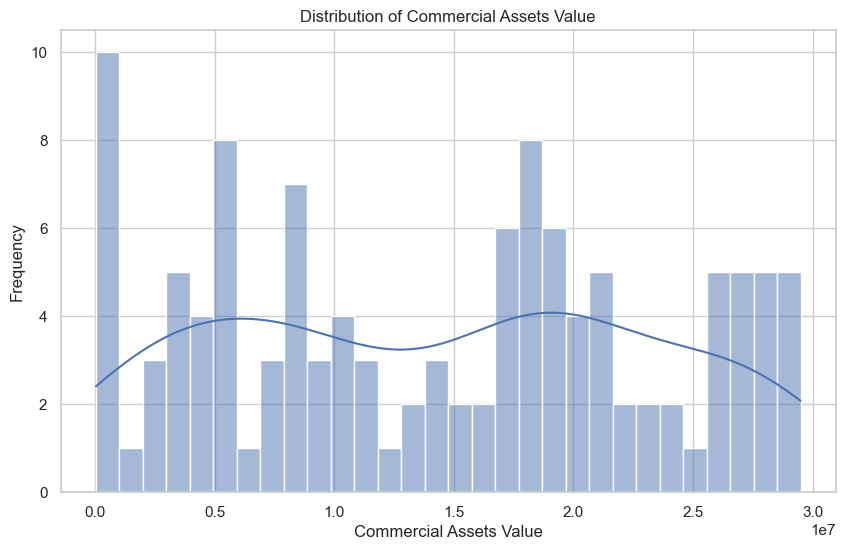

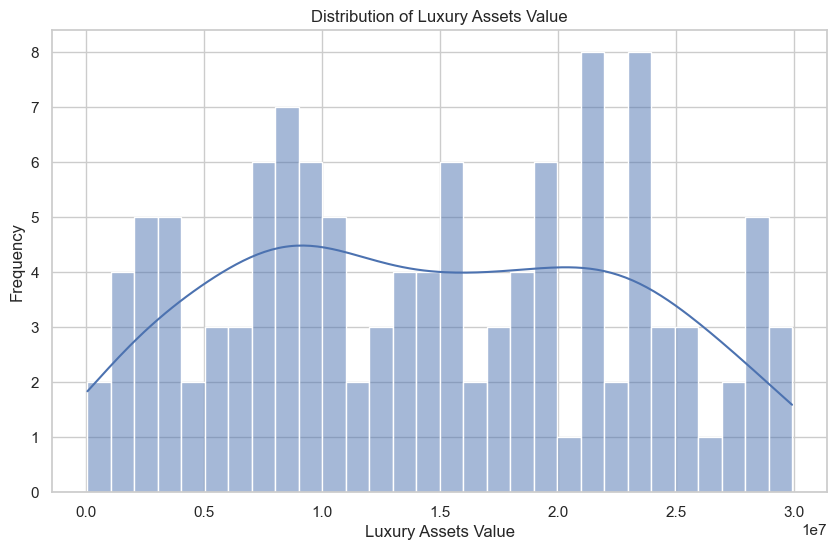

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is already loaded in the DataFrame df

# Filter the dataset for approved loans with DTI > 40%
approved_high_dti = df[(df['approval_status'] == 'Approved') & (df['DTI'] > 40)]

# Set plot style
sns.set(style="whitegrid")

# Distribution of Residential Assets Value
plt.figure(figsize=(10, 6))
sns.histplot(approved_high_dti['residential_assets_value'], bins=30, kde=True)
plt.title('Distribution of Residential Assets Value')
plt.xlabel('Residential Assets Value')
plt.ylabel('Frequency')
plt.show()

# Distribution of Commercial Assets Value
plt.figure(figsize=(10, 6))
sns.histplot(approved_high_dti['commercial_assets_value'], bins=30, kde=True)
plt.title('Distribution of Commercial Assets Value')
plt.xlabel('Commercial Assets Value')
plt.ylabel('Frequency')
plt.show()

# Distribution of Luxury Assets Value
plt.figure(figsize=(10, 6))
sns.histplot(approved_high_dti['luxury_assets_value'], bins=30, kde=True)
plt.title('Distribution of Luxury Assets Value')
plt.xlabel('Luxury Assets Value')
plt.ylabel('Frequency')
plt.show()


Correlation Matrix:
                            income_annum  cibil_score  \
income_annum                    1.000000     0.204161   
cibil_score                     0.204161     1.000000   
residential_assets_value       -0.071723    -0.235998   
commercial_assets_value         0.050485    -0.135429   
luxury_assets_value             0.066940     0.084309   
savings_account_balance        -0.009786    -0.035941   
investment_portfolio_value      0.166868     0.032174   

                            residential_assets_value  commercial_assets_value  \
income_annum                               -0.071723                 0.050485   
cibil_score                                -0.235998                -0.135429   
residential_assets_value                    1.000000                -0.169197   
commercial_assets_value                    -0.169197                 1.000000   
luxury_assets_value                        -0.155578                 0.038858   
savings_account_balance              

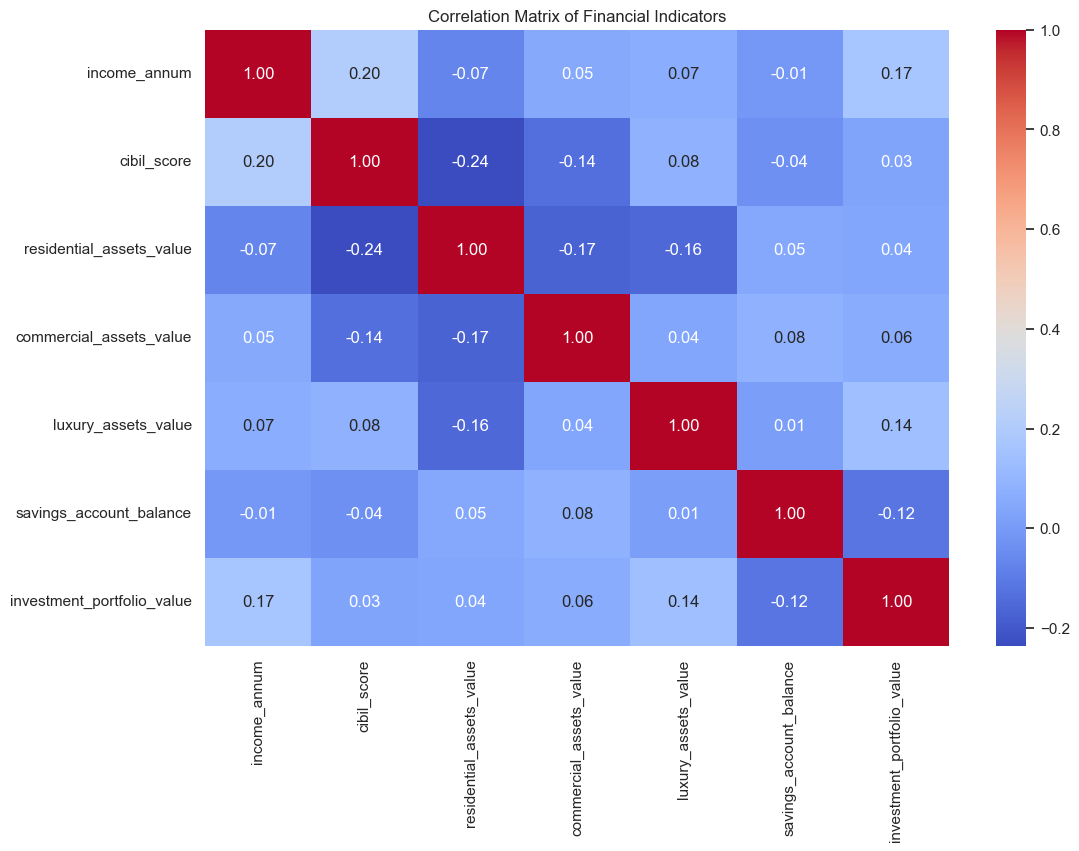

In [13]:
# Calculate correlation matrix
correlation_matrix = approved_high_dti[['income_annum', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'savings_account_balance', 'investment_portfolio_value']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Financial Indicators')
plt.show()


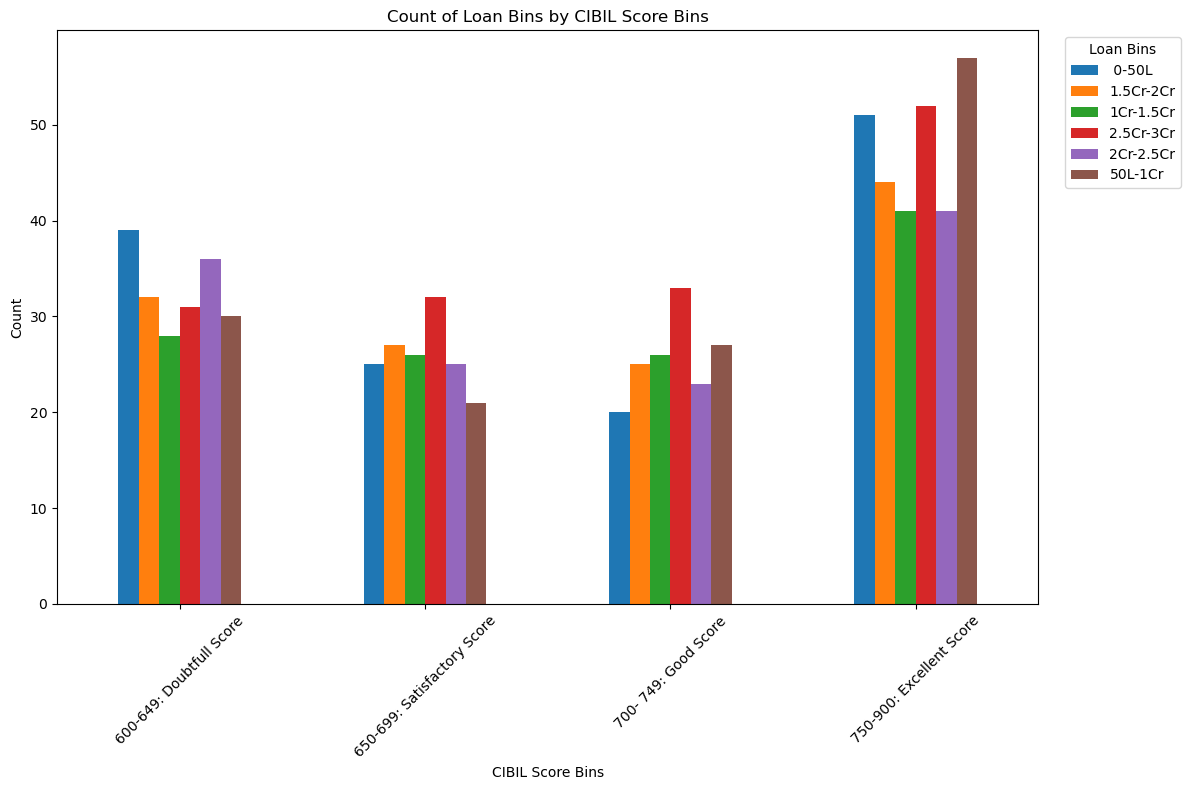

In [11]:
import matplotlib.pyplot as plt

# Group the data by CIBIL score bins and loan bins
grouped_data = df.groupby(['cibil_scorebins', 'Loan_bins']).size().unstack()

# Plot the bar chart
grouped_data.plot(kind='bar', figsize=(12, 8))
plt.xlabel('CIBIL Score Bins')
plt.ylabel('Count')
plt.title('Count of Loan Bins by CIBIL Score Bins')
plt.xticks(rotation=45)
plt.legend(title='Loan Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


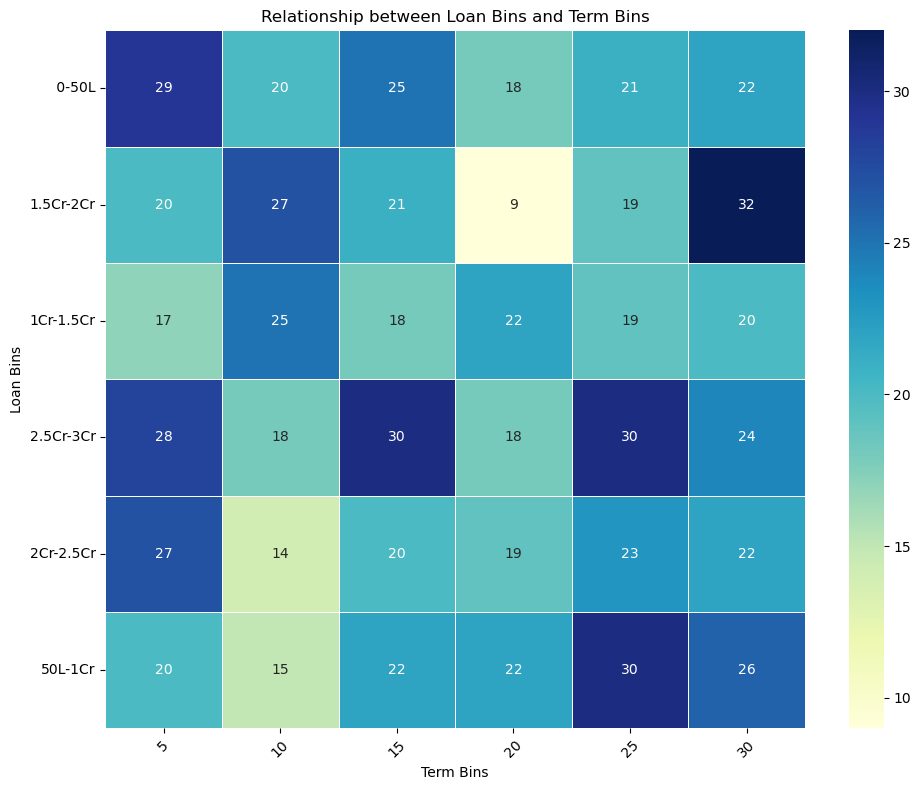

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table
contingency_table = pd.crosstab(index=df['Loan_bins'], columns=df['loan_term_yrs'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5)
plt.title('Relationship between Loan Bins and Term Bins')
plt.xlabel('Term Bins')
plt.ylabel('Loan Bins')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


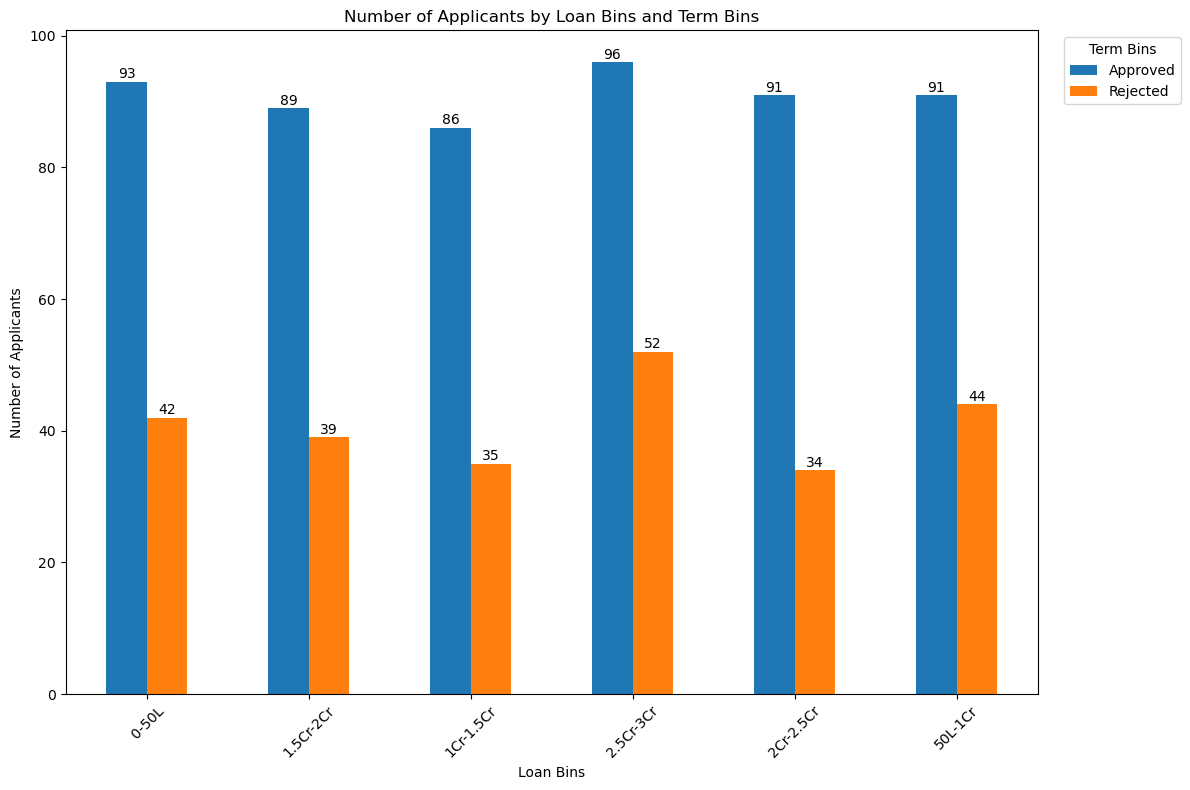

In [9]:
import matplotlib.pyplot as plt

# Group the data by Loan_bins and term_bins and count the number of applicants
grouped_data = df.groupby(['Loan_bins', 'approval_status']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)
plt.xlabel('Loan Bins')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Loan Bins and Term Bins')
plt.legend(title='Term Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)

# Annotate bars with counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()


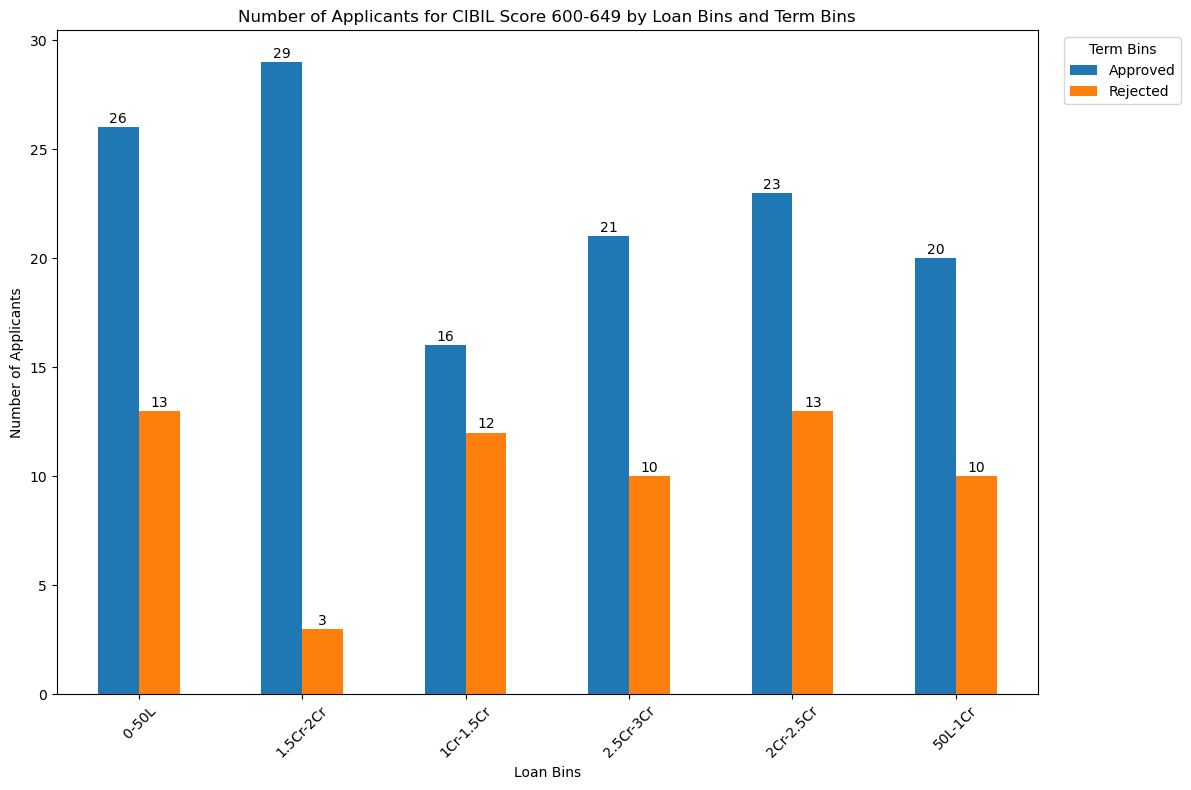

In [16]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the specified CIBIL score range
filtered_df = df[df['cibil_scorebins'] == '600-649: Doubtfull Score']

# Group the filtered data by Loan_bins and term_bins and count the number of applicants
grouped_data = filtered_df.groupby(['Loan_bins', 'approval_status']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)
plt.xlabel('Loan Bins')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants for CIBIL Score 600-649 by Loan Bins and Term Bins')
plt.legend(title='Term Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)

# Annotate bars with counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()


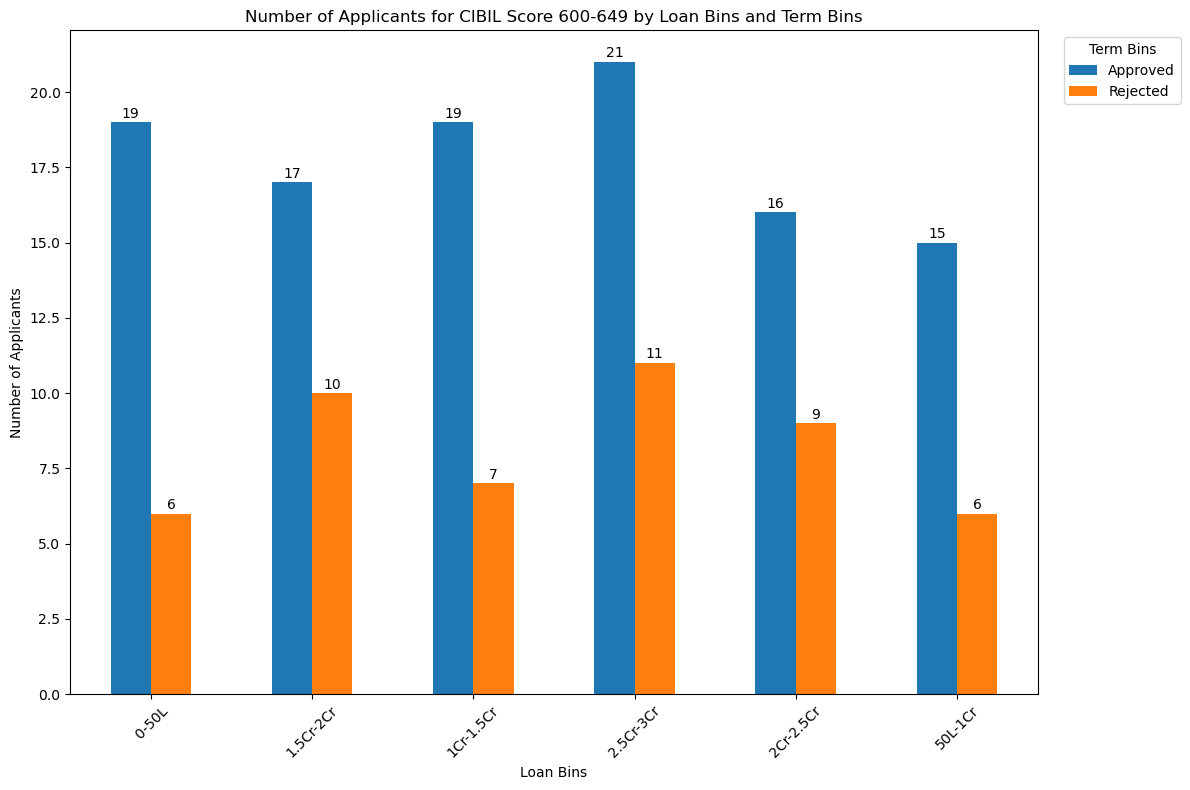

In [23]:
# Filter the DataFrame for the specified CIBIL score range
filtered_df = df[df['cibil_scorebins'] == '650-699: Satisfactory Score']

# Group the filtered data by Loan_bins and term_bins and count the number of applicants
grouped_data = filtered_df.groupby(['Loan_bins', 'approval_status']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)
plt.xlabel('Loan Bins')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants for CIBIL Score 600-649 by Loan Bins and Term Bins')
plt.legend(title='Term Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)

# Annotate bars with counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()


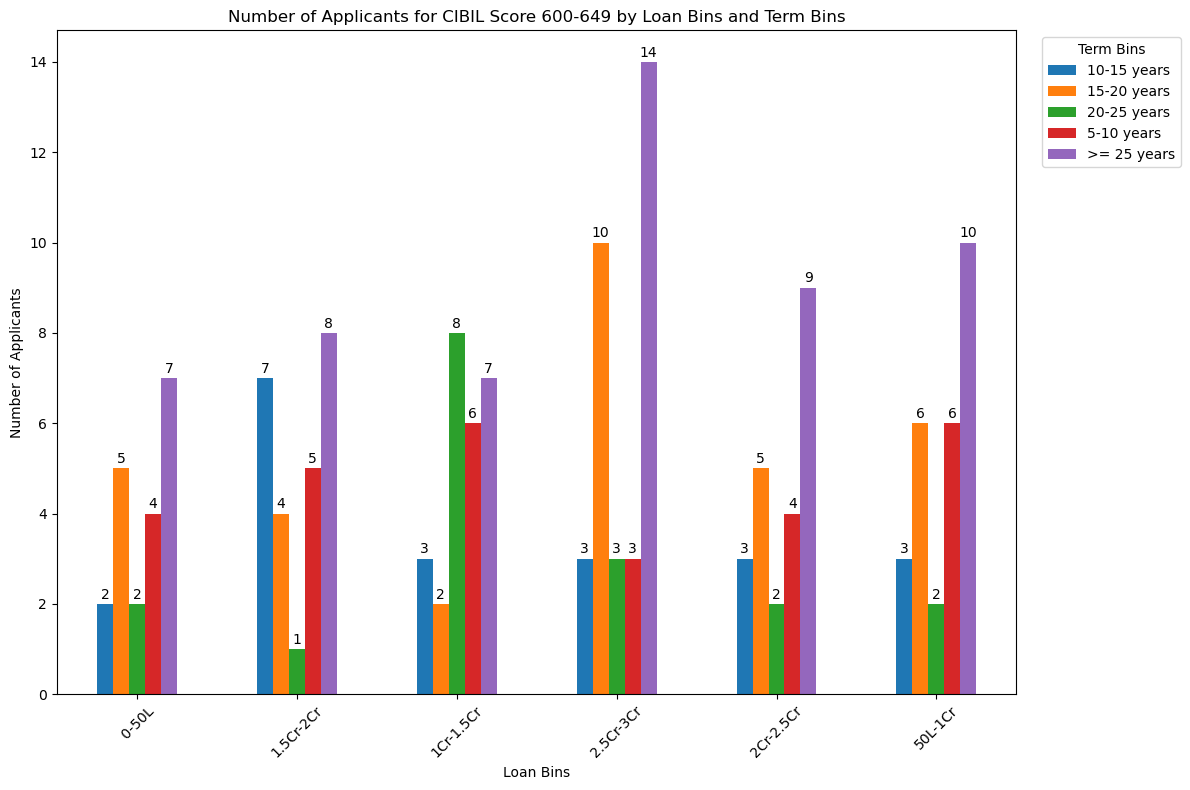

In [7]:
# Filter the DataFrame for the specified CIBIL score range
filtered_df = df[df['cibil_scorebins'] == '700- 749: Good Score']

# Group the filtered data by Loan_bins and term_bins and count the number of applicants
grouped_data = filtered_df.groupby(['Loan_bins', 'term_bins']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)
plt.xlabel('Loan Bins')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants for CIBIL Score 600-649 by Loan Bins and Term Bins')
plt.legend(title='Term Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)

# Annotate bars with counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

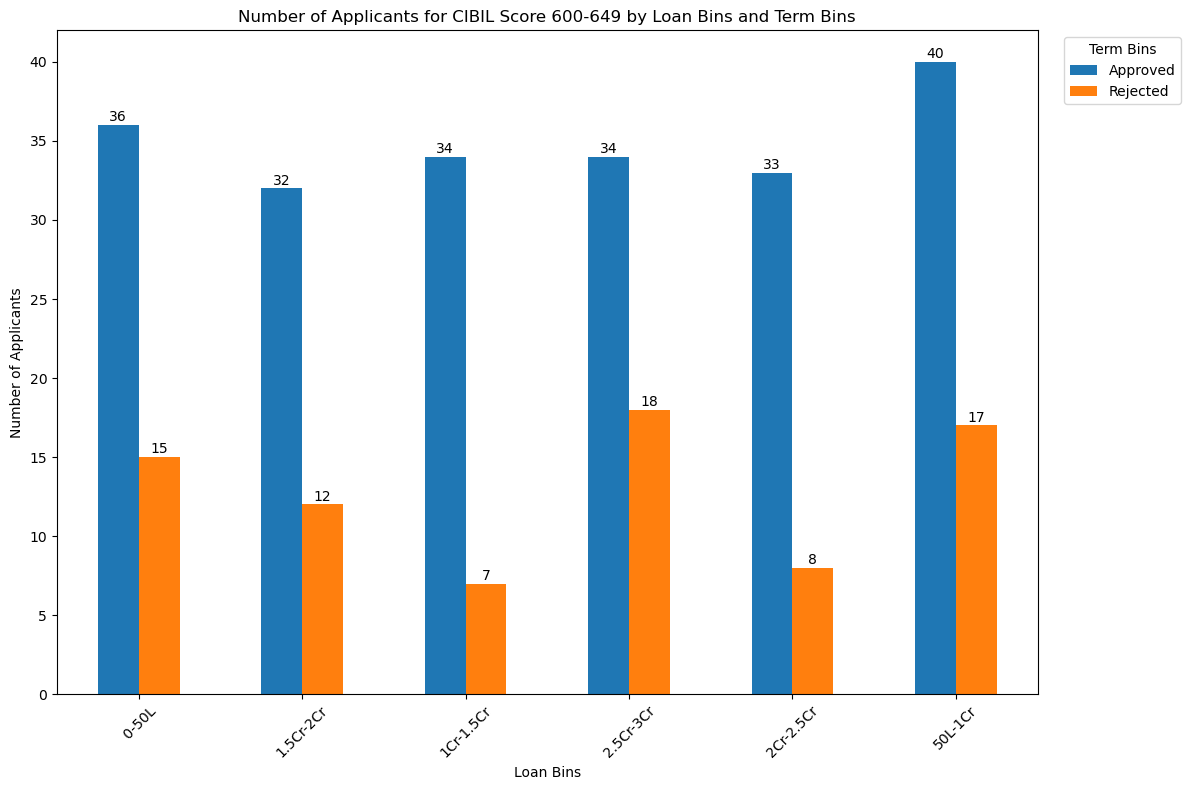

In [25]:
# Filter the DataFrame for the specified CIBIL score range
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group the filtered data by Loan_bins and term_bins and count the number of applicants
grouped_data = filtered_df.groupby(['Loan_bins', 'approval_status']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)
plt.xlabel('Loan Bins')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants for CIBIL Score 600-649 by Loan Bins and Term Bins')
plt.legend(title='Term Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)

# Annotate bars with counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

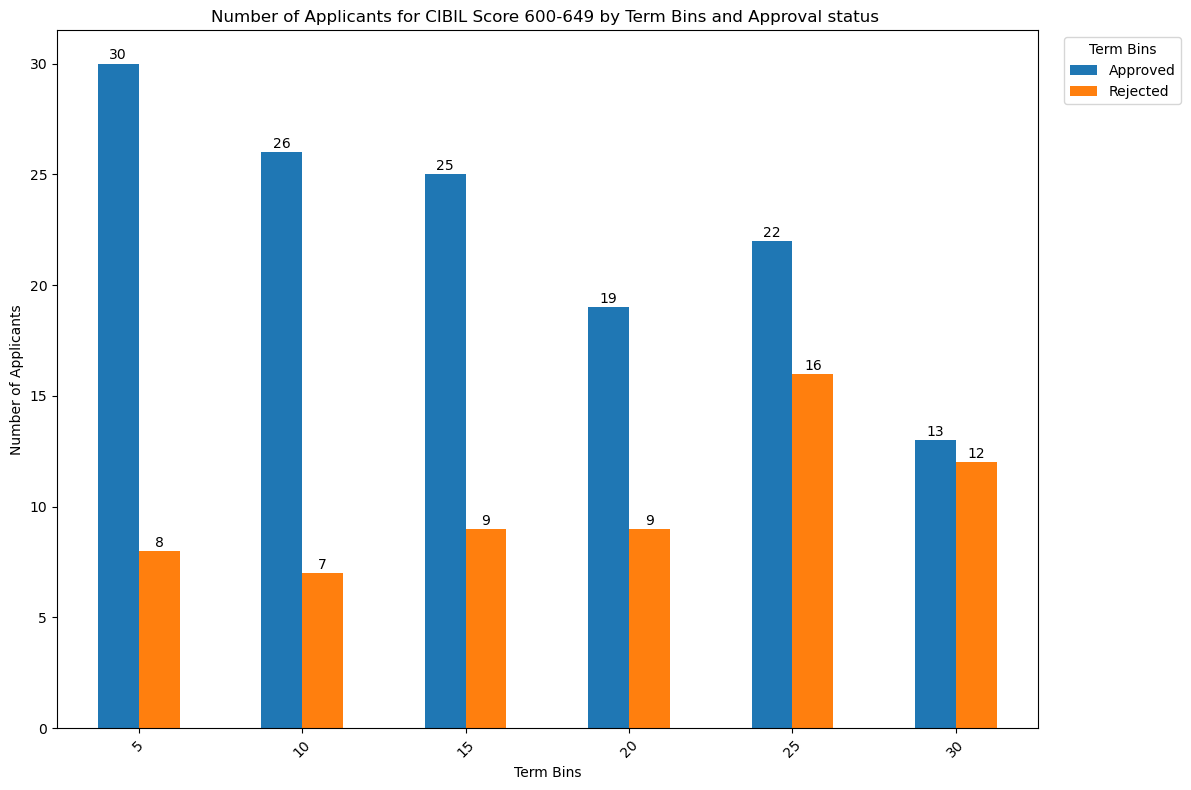

In [33]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the specified CIBIL score range
filtered_df = df[df['cibil_scorebins'] == '600-649: Doubtfull Score']

# Group the filtered data by Loan_bins and term_bins and count the number of applicants
grouped_data = filtered_df.groupby(['loan_term_yrs', 'approval_status']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)
plt.xlabel('Term Bins')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants for CIBIL Score 600-649 by Term Bins and Approval status ')
plt.legend(title='Term Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)

# Annotate bars with counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()


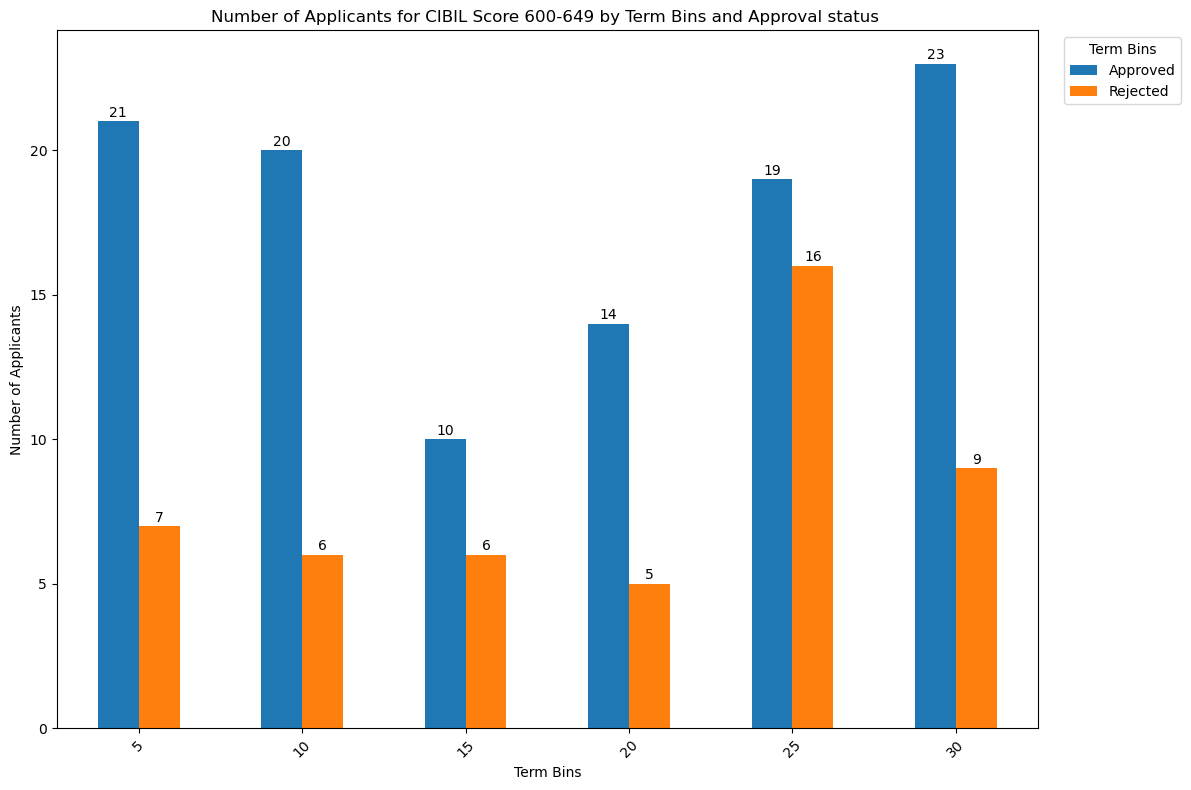

In [32]:
# Filter the DataFrame for the specified CIBIL score range
filtered_df = df[df['cibil_scorebins'] == '650-699: Satisfactory Score']

# Group the filtered data by Loan_bins and term_bins and count the number of applicants
grouped_data = filtered_df.groupby(['loan_term_yrs', 'approval_status']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)
plt.xlabel('Term Bins')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants for CIBIL Score 600-649 by Term Bins and Approval status ')
plt.legend(title='Term Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
# Annotate bars with counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()


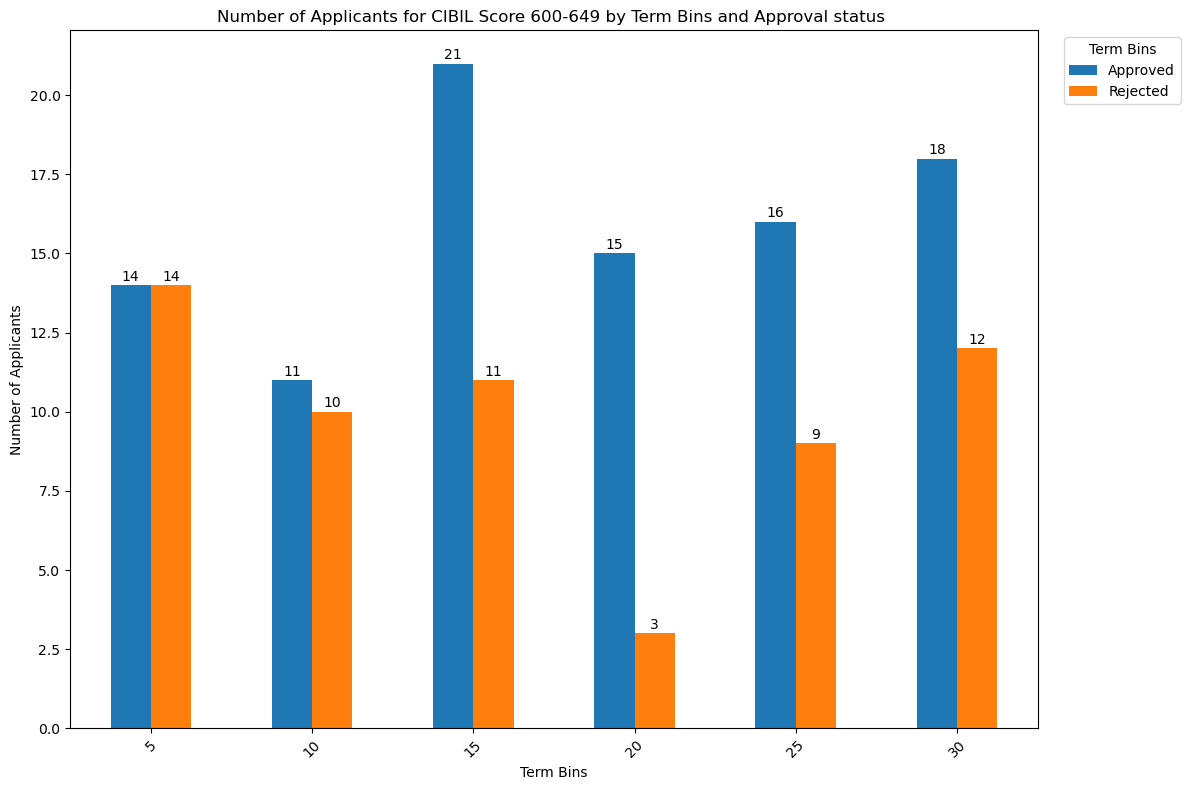

In [31]:
# Filter the DataFrame for the specified CIBIL score range
filtered_df = df[df['cibil_scorebins'] == '700- 749: Good Score']

# Group the filtered data by Loan_bins and term_bins and count the number of applicants
grouped_data = filtered_df.groupby(['loan_term_yrs', 'approval_status']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)
plt.xlabel('Term Bins')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants for CIBIL Score 600-649 by Term Bins and Approval status ')
plt.legend(title='Term Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)

# Annotate bars with counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()


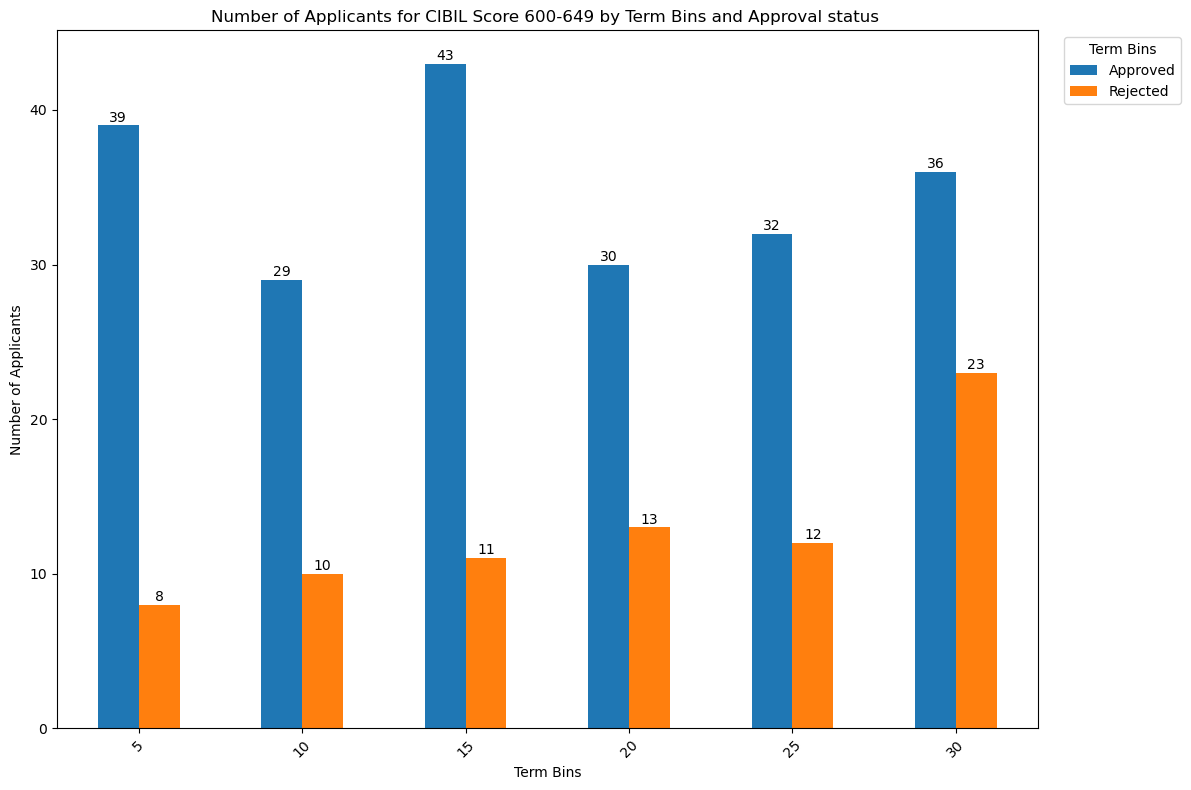

In [30]:
# Filter the DataFrame for the specified CIBIL score range
filtered_df = df[df['cibil_scorebins'] == '750-900: Excellent Score']

# Group the filtered data by Loan_bins and term_bins and count the number of applicants
grouped_data = filtered_df.groupby(['loan_term_yrs', 'approval_status']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax)
plt.xlabel('Term Bins')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants for CIBIL Score 600-649 by Term Bins and Approval status ')
plt.legend(title='Term Bins', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
# Annotate bars with counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [7]:
from scipy import stats

# Acceptance rates for 5 Years term bin
acceptance_5_years = [78.95, 78.79, 73.53, 67.86, 57.89, 52]

# Acceptance rates for 10 Years term bin
acceptance_10_years = [75, 76.92, 62.5, 73.68, 54.29, 71.88]

# Perform T-Test
t_statistic, p_value = stats.ttest_ind(acceptance_5_years, acceptance_10_years)

# Print results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in average acceptance rates between 5 Years and 10 Years term bins.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in average acceptance rates between 5 Years and 10 Years term bins.")


T-Statistic: -0.15061520458360636
P-Value: 0.883274045276687
Fail to reject null hypothesis: There is no significant difference in average acceptance rates between 5 Years and 10 Years term bins.


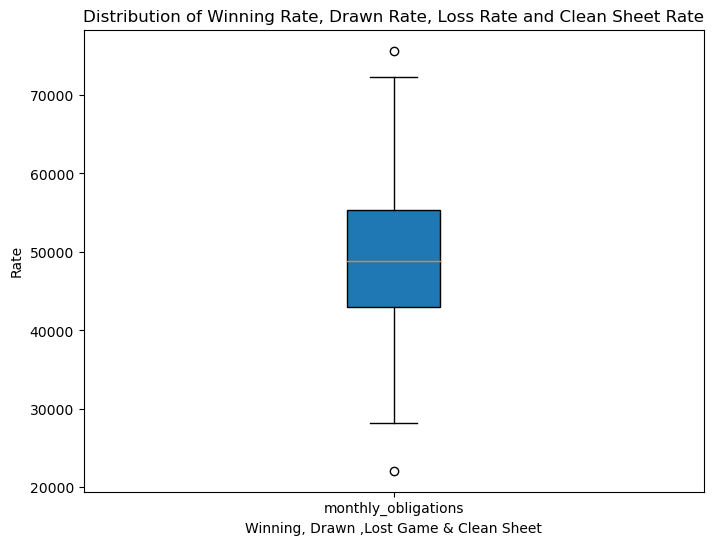

In [20]:
# Now let us visualize Winning, Loss, Drawn rate, and Clean Sheet

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
boxplot = plt.boxplot([df['monthly_obligations']],
                      patch_artist=True,
                      labels=['monthly_obligations'])

# Set the title and axis labels
plt.title('Distribution of Winning Rate, Drawn Rate, Loss Rate and Clean Sheet Rate')
plt.xlabel('Winning, Drawn ,Lost Game & Clean Sheet')
plt.ylabel('Rate')

# Show the plot
plt.show()



In [21]:
import pandas as pd
from scipy.stats import f_oneway

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'Term Bins': ['5 Years'] * 6 + ['10 Years'] * 6 + ['15 Years'] * 6 + ['20 Years'] * 6 + ['25 Years'] * 6 + ['30 Years'] * 6,
    'Acceptance': [78.95, 78.79, 73.53, 67.86, 57.89, 52, 
                   75, 76.92, 62.5, 73.68, 54.29, 71.88,
                   73.53, 62.5, 65.62, 83.33, 61.82, 100,
                   67.86, 73.68, 83.33, 61.82, 72.73, 61.02,
                   57.89, 54.29, 61.82, 72.73, 61.02, 72.73,
                   52, 71.88, None, None, None, 61.02]
}
df = pd.DataFrame(data)

# Drop rows with missing values
df.dropna(inplace=True)

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(
    df[df['Term Bins'] == '5 Years']['Acceptance'],
    df[df['Term Bins'] == '10 Years']['Acceptance'],
    df[df['Term Bins'] == '15 Years']['Acceptance'],
    df[df['Term Bins'] == '20 Years']['Acceptance'],
    df[df['Term Bins'] == '25 Years']['Acceptance'],
    df[df['Term Bins'] == '30 Years']['Acceptance']
)

# Print results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There are significant differences in acceptance rates among different term bins.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in acceptance rates among different term bins.")


F-Statistic: 0.9581421059069313
P-Value: 0.4604905975642274
Fail to reject null hypothesis: There are no significant differences in acceptance rates among different term bins.


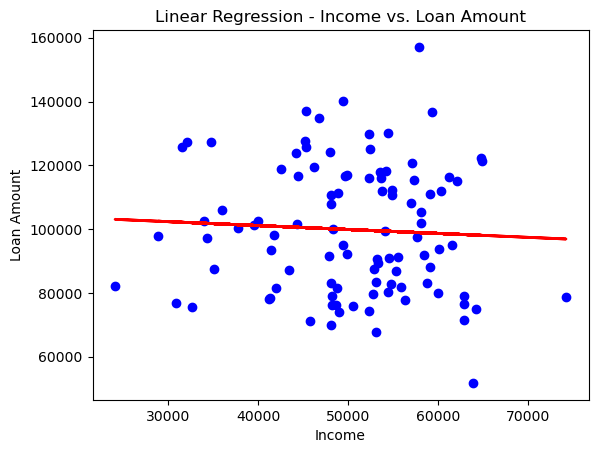

Intercept: 106032.7903303494
Coefficient (Slope): -0.1230310971284322


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'income_annum': np.random.normal(loc=50000, scale=10000, size=100),
    'loan_amount': np.random.normal(loc=100000, scale=20000, size=100)
}
df = pd.DataFrame(data)

# Extracting features (X) and target variable (y)
X = df[['income_annum']]
y = df['loan_amount']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plotting the data and the regression line
plt.scatter(X, y, color='blue')
plt.plot(X, predictions, color='red', linewidth=2)
plt.title('Linear Regression - Income vs. Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient (Slope):", model.coef_[0])


In [25]:
import pandas as pd

# Example DataFrame (replace this with your actual DataFrame)
# Let's assume your DataFrame is named 'df'
# For demonstration purposes, I'll create a sample DataFrame with the specified columns
data = {
    'Income': [50000, 60000, 70000, 80000, 90000],
    'Loan Amount': [100000, 120000, 130000, 150000, 180000],
    'CIBIL Score': [700, 720, 740, 760, 780]
}
df = pd.DataFrame(data)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               Income  Loan Amount  CIBIL Score
Income       1.000000     0.985104     1.000000
Loan Amount  0.985104     1.000000     0.985104
CIBIL Score  1.000000     0.985104     1.000000
